In [136]:
import pandas as pd
from pandas import DataFrame
import random as rm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn
import time
import networkx as nx
import pickle
import datetime
from datetime import timedelta
from datetime import datetime
import scipy.stats as sc
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from matplotlib.pyplot import figure
import dynetworkx as dnx
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [6]:
TIPLOC='BARKING'

In [7]:
#A function to read in a pickle data object 
def Pickle_read(pathtopickle):
    #Read in the pickle
    filename=pathtopickle
    pickle_in=open(filename,"rb")
    Train=pickle.load(pickle_in)
    return Train

In [8]:
#A function to calculate SRTs(Sectional running times) for the
#berth data that is imported via pickles from the Berth_data_processing
#function. The input is required to be in array format
def SRT_calculation(picklepathsarray,pattern,sigarea):
    Shift=pd.DataFrame(columns=['UTC','Area','msg_type','From','To','Headcode','RealUTC','prev_from','prev_to','prev_RealUTC','prev_headcode'])
    for i in range(0,len(picklepathsarray)):
        Train=Pickle_read(picklepathsarray[i])
        Train=Train[Train['Area']==sigarea]
        Train=Train[Train['Headcode'].str.match(pattern)]
        grouped=Train.groupby('Headcode')
        for code,group in grouped:
            g=group.copy().sort_values(by='RealUTC',ascending=True)
            g['prev_from']=g['From'].shift()
            g['prev_to']=g['To'].shift()
            g['prev_RealUTC']=g['RealUTC'].shift()
            g['prev_headcode']=g['Headcode'].shift()
            g=g.dropna()
            Shift=Shift.append(g,sort=True)
    Shift=Shift.reset_index(drop=True)
    Shift['ID']=Shift['Area']+Shift['From']+Shift['To']
    Shift['Time']=Shift['RealUTC']-Shift['prev_RealUTC']
    #pattern =r'[0-9][0-9][0-9][0-9]'
    #data = Shift[Shift['To'].str.match(pattern)]
    #data = data[data['From'].str.match(pattern)]
    #data = data[data['prev_from'].str.match(pattern)]
    #data = data[data['prev_to'].str.match(pattern)]
    SRT=pd.DataFrame(columns=['Area','From','To','Headcode','UTC','msg_type','prev_from','prev_to','prev_RealUTC','Median','STD','Mean'])
    grouped=Shift.groupby('ID')
    i=0
    for code,group in grouped:
        g=group.copy().reset_index(drop=True)
        SRT=SRT.append(g.iloc[0]).reset_index(drop=True)
        SRT.at[i,'Median']=g['Time'].median()
        SRT.at[i,'STD']=g['Time'].std()
        SRT.at[i,'Mean']=g['Time'].mean()
        i=i+1
    SRT=SRT.reset_index(drop=True)
    #SRT['STD/Mean']=SRT['STD']/SRT['Mean']
    #SRT['seconds']=SRT['Time']/np.timedelta64(1,'s')
    return SRT

In [9]:
filestring="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/Data_pickles/"
SRT=SRT_calculation([filestring+"2019-09-01Berth.pickle",filestring+"2019-09-02Berth.pickle",filestring+"2019-09-03Berth.pickle",filestring+"2019-09-04Berth.pickle",filestring+"2019-09-05Berth.pickle",filestring+"2019-09-06Berth.pickle",filestring+"2019-09-07Berth.pickle"],r'[0-9][A-Z][0-9][0-9]','UR')
SRT1=SRT_calculation([filestring+"2019-09-01Berth.pickle",filestring+"2019-09-02Berth.pickle",filestring+"2019-09-03Berth.pickle",filestring+"2019-09-04Berth.pickle",filestring+"2019-09-05Berth.pickle",filestring+"2019-09-06Berth.pickle",filestring+"2019-09-07Berth.pickle"],r'[1][A-Z][0-9][0-9]','UR')
SRT2=SRT_calculation([filestring+"2019-09-01Berth.pickle",filestring+"2019-09-02Berth.pickle",filestring+"2019-09-03Berth.pickle",filestring+"2019-09-04Berth.pickle",filestring+"2019-09-05Berth.pickle",filestring+"2019-09-06Berth.pickle",filestring+"2019-09-07Berth.pickle"],r'[2][A-Z][0-9][0-9]','UR')
SRT5=SRT_calculation([filestring+"2019-09-01Berth.pickle",filestring+"2019-09-02Berth.pickle",filestring+"2019-09-03Berth.pickle",filestring+"2019-09-04Berth.pickle",filestring+"2019-09-05Berth.pickle",filestring+"2019-09-06Berth.pickle",filestring+"2019-09-07Berth.pickle"],r'[5][A-Z][0-9][0-9]','UR')
SRT6=SRT_calculation([filestring+"2019-09-01Berth.pickle",filestring+"2019-09-02Berth.pickle",filestring+"2019-09-03Berth.pickle",filestring+"2019-09-04Berth.pickle",filestring+"2019-09-05Berth.pickle",filestring+"2019-09-06Berth.pickle",filestring+"2019-09-07Berth.pickle"],r'[6][A-Z][0-9][0-9]','UR')
SRT

,Area,From,To,Headcode,UTC,msg_type,prev_from,prev_to,prev_RealUTC,Median,STD,Mean,ID,RealUTC,Time,prev_headcode
0,UR,0105,0107,2B00,064019,CA,A507,0105,2019-09-01 06:39:31,0 days 00:00:56,0 days 00:00:05.069522,0 days 00:00:56.072072,UR01050107,2019-09-01 06:40:19,00:00:48,2B00
1,UR,0106,R101,2B01,064231,CA,0108,0106,2019-09-01 06:42:18,0 days 00:00:19,0 days 00:00:27.818806,0 days 00:00:32.169696,UR0106R101,2019-09-01 06:42:31,00:00:13,2B01
2,UR,0106,R103,2D01,072459,CA,0108,0106,2019-09-01 07:21:53,0 days 00:00:18,0 days 00:00:25.724998,0 days 00:00:24.788079,UR0106R103,2019-09-01 07:24:59,00:03:06,2D01
3,UR,0106,R505,2B13,231415,CA,0108,0106,2019-09-01 23:13:58,0 days 00:00:17,0 days 00:00:09.359930,0 days 00:00:21.190476,UR0106R505,2019-09-01 23:14:15,00:00:17,2B13
4,UR,0106,R507,2D03,082144,CA,0108,0106,2019-09-01 08:21:28,0 days 00:00:34,0 days 00:00:19.605838,0 days 00:00:35,UR0106R507,2019-09-01 08:21:44,00:00:16,2D03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,UR,L921,L918,5L31,063537,CA,L913,L921,2019-09-05 06:32:58,0 days 00:02:39,NaT,0 days 00:02:39,URL921L918,2019-09-05 06:35:37,00:02:39,5L31
401,UR,L924,L920,2J01,212554,CA,0902,L924,2019-09-01 21:24:42,0 days 00:01:10,0 days 00:00:42.431437,0 days 00:01:07.448675,URL924L920,2019-09-01 21:25:54,00:01:12,2J01
402,UR,LG12,0888,4E08,032443,CA,B920,LS21,2019-09-03 04:40:20,0 days 22:59:23,0 days 00:22:12.695858,0 days 23:01:08.250000,URLG120888,2019-09-04 03:24:43,22:44:23,4E08
403,UR,LGSD,LSLG,4L00,012225,CA,0885,LG11,2019-09-03 01:20:39,0 days 00:01:53,0 days 00:02:04.049804,0 days 00:02:23.634615,URLGSDLSLG,2019-09-03 01:22:25,00:01:46,4L00


In [10]:
#SRT=SRT_calculation(["/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle"],r'[0-9][A-Z][0-9][0-9]','UR')
#SRT1=SRT_calculation(["/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle"],r'[1][A-Z][0-9][0-9]','UR')
#SRT2=SRT_calculation(["/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle"],r'[2][A-Z][0-9][0-9]','UR')
#SRT5=SRT_calculation(["/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle"],r'[5][A-Z][0-9][0-9]','UR')
#SRT6=SRT_calculation(["/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle"],r'[6][A-Z][0-9][0-9]','UR')
#SRT

In [11]:
def Timetable_Processing(Timetablepath,Berthdata,STANberth):
    #Read in all required data as well as some initial processing
    pickle_in=open(Timetablepath,"rb")
    Timetable=pickle.load(pickle_in)
    pickle_in=open(STANberth,"rb")
    STANberth=pickle.load(pickle_in)
    STANberth1=STANberth[STANberth['TD_ID']=='UR'].reset_index(drop=True)
    IntTIPLOC=STANberth1['TIPLOC'].unique()
    pickle_in=open(Berthdata,"rb")
    Berthdata=pickle.load(pickle_in)
    Berthdata['TIPLOC']=Berthdata['Area']
    Berthdata['Offset']=Berthdata['Area']
    Berthdata['Sched']=Berthdata['Area']
    #Select only timetable entries in the chosen signalling area
    for i in range(0,len(Timetable)):
        #Timetable.at[i,'Time']=pd.to_datetime(str(Timetable['Date'][i])[0:10]+str(Timetable['Time'][i])[11:19],format='%Y-%m-%d%H:%M:%S')
        Timetable.at[i,'Time']=pd.to_datetime(Timetablepath[76:86]+str(Timetable['Time'][i])[11:19],format='%Y-%m-%d%H:%M:%S')
        if np.isin(Timetable['Location'][i],IntTIPLOC)==False:
            Timetable=Timetable.drop(i)
    Timetable=Timetable.reset_index(drop=True)
    #Fix issues with the data
    AltTimetable=pd.DataFrame()
    grouped=Timetable.groupby('TrainUID')
    for code,group in grouped:
        g=group.copy().reset_index(drop=True)
        g.at[0,'Msg_type']='LO'
        g.at[len(g)-1,'Msg_type']='LT'
        for i in range(0,len(g)-1):
            if g['Location'][i]=='PITSEA' and g['Location'][i+1]=='OCKENDN':
                g.at[i,'Msg_type']='LT'
        if len(g)>=1:
            AltTimetable=AltTimetable.append(g).reset_index(drop=True)
    for i in range(0,len(AltTimetable)):
        #if int(AltTimetable['Dept'][i][0:4])<=400:
        if int(AltTimetable['SchedDept'][i][0:4])<=400:
            #AltTimetable.at[i,'Date']=AltTimetable['Date'][i]+timedelta(days=1)
            #AltTimetable.at[i,'Time']=AltTimetable['Time'][i]+timedelta(days=1)
            AltTimetable.at[i,'DeptTime']=AltTimetable['DeptTime'][i]+timedelta(days=1)
    #Combine the berth data with that of the timetable
    a=AltTimetable['Headcode'].unique()
    b=Berthdata['Headcode'].unique()
    c=np.array([])
    for i in range(0,len(b)):
        if np.isin(b[i],a)==True:
            c=np.append(c,b[i])
    NewDf=pd.DataFrame(columns=Berthdata.columns)
    for l in range(0,len(c)):
        PrepTrain=Berthdata[Berthdata['Headcode']==c[l]].reset_index(drop=True)
        PrepSched=AltTimetable[AltTimetable['Headcode']==c[l]].reset_index(drop=True)
        for i in range(0,len(PrepTrain['TIPLOC'])):
            for j in range(0,len(PrepSched['Location'])):
                for k in range(0,len(PrepSched['Berth'][j])):
                    if PrepTrain['From'][i]==PrepSched['Berth'][j][k][0] and PrepTrain['To'][i]==PrepSched['Berth'][j][k][1]:
                        PrepTrain.at[i,'TIPLOC']=PrepSched['Location'][j]
                        PrepTrain.at[i,'Offset']=int(PrepSched['Offset'][j][k])
                        PrepTrain.at[i,'Sched']=PrepSched['Time'][j]
        NewDf=NewDf.append(PrepTrain)
    NewDf=NewDf.reset_index(drop=True)
    #Get at list of trains with both timetable and berth data
    e=np.array([])
    for i in range(0,len(b)):
        if np.isin(b[i],a)==False:
            e=np.append(e,b[i])
    STANberth1=STANberth1.reset_index(drop=True)
    #Add in missing TIPLOCs from the STANOXberth data
    NewerDf=pd.DataFrame(columns=Berthdata.columns)
    q=0
    for i in range(0,len(e)):
        PrepTrain=Berthdata[Berthdata['Headcode']==e[i]].reset_index(drop=True)
        for j in range(0,len(PrepTrain)):
            for k in range(0,len(STANberth1)):
                if PrepTrain['From'][j]==STANberth1['FROMBERTH'][k]and PrepTrain['To'][j]==STANberth1['TOBERTH'][k]:
                    PrepTrain.at[j,'TIPLOC']=STANberth1['TIPLOC'][k]
                    PrepTrain.at[j,'Offset']=int(STANberth1['PASSINGOFFSET'][k])
                    PrepTrain.at[j,'Sched']='None'
                    q=q+1
        NewerDf=NewerDf.append(PrepTrain).reset_index(drop=True)
    Fdf=NewDf.append(NewerDf).sort_values(by=['RealUTC'],ascending=[True]).reset_index(drop=True)
    pattern=r'[A-Z][A-Z][0-9][0-9]'
    Fdf=Fdf[Fdf['From'].str.match(pattern)==False].reset_index(drop=True)
    pattern=r'[3][A-Z][0-9][0-9]'
    Fdf=Fdf[Fdf['Headcode'].str.match(pattern)==False].reset_index(drop=True)
    return Fdf

In [12]:
Sep01Fdf=Timetable_Processing(filestring+"Pro2019-09-01Timetable.pickle",filestring+"2019-09-01Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep02Fdf=Timetable_Processing(filestring+"Pro2019-09-02Timetable.pickle",filestring+"2019-09-02Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep03Fdf=Timetable_Processing(filestring+"Pro2019-09-03Timetable.pickle",filestring+"2019-09-03Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep04Fdf=Timetable_Processing(filestring+"Pro2019-09-04Timetable.pickle",filestring+"2019-09-04Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep05Fdf=Timetable_Processing(filestring+"Pro2019-09-05Timetable.pickle",filestring+"2019-09-05Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep06Fdf=Timetable_Processing(filestring+"Pro2019-09-06Timetable.pickle",filestring+"2019-09-06Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep07Fdf=Timetable_Processing(filestring+"Pro2019-09-07Timetable.pickle",filestring+"2019-09-07Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep07Fdf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched
0,040128,UR,CA,1053,R354,5B01,2019-09-07 04:01:28,SHBRYNS,60,2019-09-07 04:05:00
1,040220,UR,CA,0888,0886,4M83,2019-09-07 04:02:20,UR,UR,UR
2,040906,UR,CA,0667,0669,4L80,2019-09-07 04:09:06,UR,UR,UR
3,040916,UR,CA,0630,0628,4E08,2019-09-07 04:09:16,UR,UR,UR
4,040929,UR,CA,0669,0671,4L80,2019-09-07 04:09:29,UR,UR,UR
...,...,...,...,...,...,...,...,...,...,...
19781,014259,UR,CA,0351,0353,2B78,2019-09-08 01:42:59,UR,UR,UR
19782,014346,UR,CA,0353,R354,2B78,2019-09-08 01:43:46,SHBRYNS,94,None
19783,014854,UR,CA,C354,A354,5S35,2019-09-08 01:48:54,UR,UR,UR
19784,015302,UR,CA,A354,SBCE,5S35,2019-09-08 01:53:02,SHBRYNS,0,None


In [13]:
Sep08Fdf=Timetable_Processing(filestring+"Pro2019-09-08Timetable.pickle",filestring+"2019-09-08Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep09Fdf=Timetable_Processing(filestring+"Pro2019-09-09Timetable.pickle",filestring+"2019-09-09Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep10Fdf=Timetable_Processing(filestring+"Pro2019-09-10Timetable.pickle",filestring+"2019-09-10Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep11Fdf=Timetable_Processing(filestring+"Pro2019-09-11Timetable.pickle",filestring+"2019-09-11Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep12Fdf=Timetable_Processing(filestring+"Pro2019-09-12Timetable.pickle",filestring+"2019-09-12Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep13Fdf=Timetable_Processing(filestring+"Pro2019-09-13Timetable.pickle",filestring+"2019-09-13Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep14Fdf=Timetable_Processing(filestring+"Pro2019-09-14Timetable.pickle",filestring+"2019-09-14Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep14Fdf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched
0,040007,UR,CA,1055,R354,5B01,2019-09-14 04:00:07,SHBRYNS,165,2019-09-14 04:05:00
1,040218,UR,CA,0888,0886,4M83,2019-09-14 04:02:18,UR,UR,UR
2,040423,UR,CA,LGSD,LSLG,4L80,2019-09-14 04:04:23,UR,UR,UR
3,040616,UR,CA,0630,0628,4E08,2019-09-14 04:06:16,UR,UR,UR
4,040656,UR,CA,0628,0626,4E08,2019-09-14 04:06:56,UR,UR,UR
...,...,...,...,...,...,...,...,...,...,...
19411,014452,UR,CA,0353,R354,2B78,2019-09-15 01:44:52,SHBRYNS,94,None
19412,015348,UR,CA,C354,A354,5S35,2019-09-15 01:53:48,UR,UR,UR
19413,015640,UR,CA,A354,SBCE,5S35,2019-09-15 01:56:40,SHBRYNS,0,None
19414,020842,UR,CA,0337,0339,****,2019-09-15 02:08:42,STHNDE,25,None


In [14]:
Sep15Fdf=Timetable_Processing(filestring+"Pro2019-09-15Timetable.pickle",filestring+"2019-09-15Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep16Fdf=Timetable_Processing(filestring+"Pro2019-09-16Timetable.pickle",filestring+"2019-09-16Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep17Fdf=Timetable_Processing(filestring+"Pro2019-09-17Timetable.pickle",filestring+"2019-09-17Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep18Fdf=Timetable_Processing(filestring+"Pro2019-09-18Timetable.pickle",filestring+"2019-09-18Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep19Fdf=Timetable_Processing(filestring+"Pro2019-09-19Timetable.pickle",filestring+"2019-09-19Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep20Fdf=Timetable_Processing(filestring+"Pro2019-09-20Timetable.pickle",filestring+"2019-09-20Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep21Fdf=Timetable_Processing(filestring+"Pro2019-09-21Timetable.pickle",filestring+"2019-09-21Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep21Fdf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched
0,040027,UR,CA,0862,0860,4E08,2019-09-21 04:00:27,UR,UR,UR
1,040239,UR,CA,0860,0858,4E08,2019-09-21 04:02:39,UR,UR,UR
2,040317,UR,CA,0858,0854,4E08,2019-09-21 04:03:17,UR,UR,UR
3,040504,UR,CA,0588,0350,5D01,2019-09-21 04:05:04,UR,UR,UR
4,040556,UR,CA,0854,0852,4E08,2019-09-21 04:05:56,UR,UR,UR
...,...,...,...,...,...,...,...,...,...,...
20035,014300,UR,CA,0353,R354,2B78,2019-09-22 01:43:00,SHBRYNS,94,None
20036,014328,UR,CA,B592,A592,5S33,2019-09-22 01:43:28,UR,UR,UR
20037,014407,UR,CA,A592,SBCE,5S33,2019-09-22 01:44:07,SHBRYNS,0,None
20038,015245,UR,CA,C354,A354,5S35,2019-09-22 01:52:45,UR,UR,UR


In [15]:
Sep22Fdf=Timetable_Processing(filestring+"Pro2019-09-22Timetable.pickle",filestring+"2019-09-22Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep23Fdf=Timetable_Processing(filestring+"Pro2019-09-23Timetable.pickle",filestring+"2019-09-23Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep24Fdf=Timetable_Processing(filestring+"Pro2019-09-24Timetable.pickle",filestring+"2019-09-24Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep25Fdf=Timetable_Processing(filestring+"Pro2019-09-25Timetable.pickle",filestring+"2019-09-25Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep26Fdf=Timetable_Processing(filestring+"Pro2019-09-26Timetable.pickle",filestring+"2019-09-26Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep27Fdf=Timetable_Processing(filestring+"Pro2019-09-27Timetable.pickle",filestring+"2019-09-27Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep28Fdf=Timetable_Processing(filestring+"Pro2019-09-28Timetable.pickle",filestring+"2019-09-28Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep28Fdf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched
0,040001,UR,CA,1055,R354,5B01,2019-09-28 04:00:01,SHBRYNS,165,2019-09-28 04:05:00
1,040001,UR,CA,0674,0672,4E08,2019-09-28 04:00:01,UR,UR,UR
2,040034,UR,CA,0672,0670,4E08,2019-09-28 04:00:34,UR,UR,UR
3,040104,UR,CA,0885,LG11,4L80,2019-09-28 04:01:04,UR,UR,UR
4,040107,UR,CA,0670,0668,4E08,2019-09-28 04:01:07,UR,UR,UR
...,...,...,...,...,...,...,...,...,...,...
24155,014503,UR,CA,0353,R592,2B78,2019-09-29 01:45:03,SHBRYNS,83,None
24156,014627,UR,CA,C354,A354,5S33,2019-09-29 01:46:27,UR,UR,UR
24157,014830,UR,CA,A354,SBCE,5S33,2019-09-29 01:48:30,SHBRYNS,0,None
24158,015311,UR,CA,B592,A592,5S35,2019-09-29 01:53:11,UR,UR,UR


In [23]:
Timetable=Pickle_read(filestring+"2019-10-05Timetable.pickle")
Timetable['DeptTime']=Timetable['Time']
for i in range(0,len(Timetable)):
    if Timetable['SchedDept'][i][0]==' ':
        Timetable.at[i,'SchedDept']=Timetable['SchedPass'][i]
    if Timetable['SchedDept'][i][0]==' ':
        Timetable.at[i,'SchedDept']=Timetable['SchedArr'][i]
#pickle_out=open("Pro2019-10-05Timetable.pickle","wb")
#pickle.dump(Timetable, pickle_out)
Timetable

,Msg_type,Location,SchedArr,SchedDept,SchedPass,PubArr,PubDept,Platform,Line,Path,...,Pathallow,Perfallow,TrainUID,Headcode,Date,Berth,Offset,Dept,Time,DeptTime
0,LO,GOSPLOK,,0029,,,0000,3,,,...,,,52bd,5J28,2019-10-05 00:00:00,"[[1007, 1011], [1008, 1006], [1010, 1008], [10...","[20, -34, 62, -15, -11, -6, 73, 75, -18, 46, 0...",0029,2019-10-01 00:29:00,2019-10-01 00:29:00
1,LI,JRDJ,,0031,0031,0000,0000,,,,...,1,,52bd,5J28,2019-10-05 00:00:00,NaN,NaN,0031,2019-10-01 00:31:00,2019-10-01 00:31:00
2,LI,UPRHLWY,,0032H,0032H,0000,0000,2,,,...,1,,52bd,5J28,2019-10-05 00:00:00,"[[ST06, ST04], [ST07, ST09], [STIN, ST07], [U0...","[115, -90, 30, -30]",0032H,2019-10-01 00:32:30,2019-10-01 00:32:30
3,LI,HRGYPJN,,0035H,0035H,0000,0000,,,,...,,,52bd,5J28,2019-10-05 00:00:00,"[[0411, 0431], [ST06, ST04], [ST07, ST09], [ST...","[-30, 11, 41, 11]",0035H,2019-10-01 00:35:30,2019-10-01 00:35:30
4,LI,STOTNHM,,0039,0039,0000,0000,2,,,...,,,52bd,5J28,2019-10-05 00:00:00,"[[ST12, ST10], [ST13, ST19], [ST16, ST19], [ST...","[-72, 40, 40, -90, 17]",0039,2019-10-01 00:39:00,2019-10-01 00:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13467,LO,RPLANEX,,0049,,,0000,1,,,...,,,O6Zk,4X29,2019-10-05 00:00:00,NaN,NaN,0049,2019-10-01 00:49:00,2019-10-01 00:49:00
13468,LI,RPLLRRJ,,0052,0052,0000,0000,,,,...,,,O6Zk,4X29,2019-10-05 00:00:00,NaN,NaN,0052,2019-10-01 00:52:00,2019-10-01 00:52:00
13469,LI,RPLLWSS,0055,0059,,0000,0000,,,,...,,,O6Zk,4X29,2019-10-05 00:00:00,NaN,NaN,0055,2019-10-01 00:55:00,2019-10-01 00:55:00
13470,LI,RPLLRRJ,,0102,0102,0000,0000,,,,...,,,O6Zk,4X29,2019-10-05 00:00:00,NaN,NaN,0102,2019-10-01 01:02:00,2019-10-01 01:02:00


In [ ]:
filestring+"2019-10-05Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")

In [225]:
#Read in all required data as well as some initial processing
Timetablepath=filestring+"Pro2019-10-05Timetable.pickle"
pickle_in=open("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle","rb")
STANberth=pickle.load(pickle_in)
STANberth1=STANberth[STANberth['TD_ID']=='UR'].reset_index(drop=True)
IntTIPLOC=STANberth1['TIPLOC'].unique()
pickle_in=open(filestring+"2019-10-05Berth.pickle","rb")
Berthdata=pickle.load(pickle_in)
Berthdata['TIPLOC']=Berthdata['Area']
Berthdata['Offset']=Berthdata['Area']
Berthdata['Sched']=Berthdata['Area']
#Select only timetable entries in the chosen signalling area
for i in range(0,len(Timetable)):
    #Timetable.at[i,'Time']=pd.to_datetime(str(Timetable['Date'][i])[0:10]+str(Timetable['Time'][i])[11:19],format='%Y-%m-%d%H:%M:%S')
    Timetable.at[i,'Time']=pd.to_datetime(Timetablepath[76:86]+str(Timetable['Time'][i])[11:19],format='%Y-%m-%d%H:%M:%S')
    if np.isin(Timetable['Location'][i],IntTIPLOC)==False:
        Timetable=Timetable.drop(i)
Timetable=Timetable.reset_index(drop=True)
#Fix issues with the data
AltTimetable=pd.DataFrame()
grouped=Timetable.groupby('TrainUID')
for code,group in grouped:
    g=group.copy().reset_index(drop=True)
    g.at[0,'Msg_type']='LO'
    g.at[len(g)-1,'Msg_type']='LT'
    for i in range(0,len(g)-1):
        if g['Location'][i]=='PITSEA' and g['Location'][i+1]=='OCKENDN':
            g.at[i,'Msg_type']='LT'
    if len(g)>=1:
        AltTimetable=AltTimetable.append(g).reset_index(drop=True)
for i in range(0,len(AltTimetable)):
    #if int(AltTimetable['Dept'][i][0:4])<=400:
    if int(AltTimetable['SchedDept'][i][0:4])<=400:
        #AltTimetable.at[i,'Date']=AltTimetable['Date'][i]+timedelta(days=1)
        #AltTimetable.at[i,'Time']=AltTimetable['Time'][i]+timedelta(days=1)
        AltTimetable.at[i,'DeptTime']=AltTimetable['DeptTime'][i]+timedelta(days=1)
#Combine the berth data with that of the timetable
a=AltTimetable['Headcode'].unique()
b=Berthdata['Headcode'].unique()
c=np.array([])
for i in range(0,len(b)):
    if np.isin(b[i],a)==True:
        c=np.append(c,b[i])
NewDf=pd.DataFrame(columns=Berthdata.columns)
for l in range(0,len(c)):
    PrepTrain=Berthdata[Berthdata['Headcode']==c[l]].reset_index(drop=True)
    PrepSched=AltTimetable[AltTimetable['Headcode']==c[l]].reset_index(drop=True)
    for i in range(0,len(PrepTrain['TIPLOC'])):
        for j in range(0,len(PrepSched['Location'])):
            for k in range(0,len(PrepSched['Berth'][j])):
                if PrepTrain['From'][i]==PrepSched['Berth'][j][k][0] and PrepTrain['To'][i]==PrepSched['Berth'][j][k][1]:
                    PrepTrain.at[i,'TIPLOC']=PrepSched['Location'][j]
                    PrepTrain.at[i,'Offset']=int(PrepSched['Offset'][j][k])
                    PrepTrain.at[i,'Sched']=PrepSched['Time'][j]
    NewDf=NewDf.append(PrepTrain)
NewDf=NewDf.reset_index(drop=True)
#Get at list of trains with both timetable and berth data
e=np.array([])
for i in range(0,len(b)):
    if np.isin(b[i],a)==False:
        e=np.append(e,b[i])
STANberth1=STANberth1.reset_index(drop=True)
#Add in missing TIPLOCs from the STANOXberth data
NewerDf=pd.DataFrame(columns=Berthdata.columns)
q=0
for i in range(0,len(e)):
    PrepTrain=Berthdata[Berthdata['Headcode']==e[i]].reset_index(drop=True)
    for j in range(0,len(PrepTrain)):
        for k in range(0,len(STANberth1)):
            if PrepTrain['From'][j]==STANberth1['FROMBERTH'][k]and PrepTrain['To'][j]==STANberth1['TOBERTH'][k]:
                PrepTrain.at[j,'TIPLOC']=STANberth1['TIPLOC'][k]
                PrepTrain.at[j,'Offset']=int(STANberth1['PASSINGOFFSET'][k])
                PrepTrain.at[j,'Sched']='None'
                q=q+1
    NewerDf=NewerDf.append(PrepTrain).reset_index(drop=True)
Fdf=NewDf.append(NewerDf).sort_values(by=['RealUTC'],ascending=[True]).reset_index(drop=True)
pattern=r'[A-Z][A-Z][0-9][0-9]'
Fdf=Fdf[Fdf['From'].str.match(pattern)==False].reset_index(drop=True)
pattern=r'[3][A-Z][0-9][0-9]'
Fdf=Fdf[Fdf['Headcode'].str.match(pattern)==False].reset_index(drop=True)

In [226]:
Fdf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched
0,040009,UR,CA,0611,0911,4L80,2019-10-05 04:00:09,BARKING,0,None
1,040048,UR,CA,0911,0529,4L80,2019-10-05 04:00:48,UR,UR,UR
2,040112,UR,CA,0610,0604,4M83,2019-10-05 04:01:12,BARKING,0,2019-10-05 04:00:00
3,040124,UR,CA,1053,R354,5B01,2019-10-05 04:01:24,SHBRYNS,60,2019-10-05 04:05:00
4,040133,UR,CA,0529,0177,4L80,2019-10-05 04:01:33,UR,UR,UR
...,...,...,...,...,...,...,...,...,...,...
19613,014407,UR,CA,0353,R354,2B78,2019-10-06 01:44:07,SHBRYNS,94,None
19614,014931,UR,CA,B592,A592,5S33,2019-10-06 01:49:31,UR,UR,UR
19615,015052,UR,CA,A592,SBCE,5S33,2019-10-06 01:50:52,SHBRYNS,0,None
19616,030012,UR,CA,C354,A354,5S35,2019-10-06 03:00:12,UR,UR,UR


In [227]:
Oct05Fdf=Fdf.copy()

In [228]:
Sep29Fdf=Timetable_Processing(filestring+"Pro2019-09-29Timetable.pickle",filestring+"2019-09-29Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Sep30Fdf=Timetable_Processing(filestring+"Pro2019-09-30Timetable.pickle",filestring+"2019-09-30Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Oct01Fdf=Timetable_Processing(filestring+"Pro2019-10-01Timetable.pickle",filestring+"2019-10-01Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Oct02Fdf=Timetable_Processing(filestring+"Pro2019-10-02Timetable.pickle",filestring+"2019-10-02Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Oct03Fdf=Timetable_Processing(filestring+"Pro2019-10-03Timetable.pickle",filestring+"2019-10-03Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Oct04Fdf=Timetable_Processing(filestring+"Pro2019-10-04Timetable.pickle",filestring+"2019-10-04Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
#Oct05Fdf=Timetable_Processing(filestring+"Pro2019-10-05Timetable.pickle",filestring+"2019-10-05Berth.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Oct04Fdf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched
0,040011,UR,CA,0348,0344,5D01,2019-10-04 04:00:11,THOPBAY,33,2019-10-04 04:05:00
1,040035,UR,CA,0255,0259,6U86,2019-10-04 04:00:35,UR,UR,UR
2,040143,UR,CA,1055,R354,5B53,2019-10-04 04:01:43,SHBRYNS,165,2019-10-04 04:05:00
3,040239,UR,CA,0259,0265,6U86,2019-10-04 04:02:39,BASILDN,41,2019-10-04 22:40:00
4,040659,UR,CA,0344,0342,2D01,2019-10-04 04:06:59,THOPBAY,-41,2019-10-04 04:06:00
...,...,...,...,...,...,...,...,...,...,...
31023,035737,UR,CA,0601,0605,4L80,2019-10-05 03:57:37,UR,UR,UR
31024,035759,UR,CA,0176,0916,4M83,2019-10-05 03:57:59,UR,UR,UR
31025,035854,UR,CA,0916,0910,4M83,2019-10-05 03:58:54,UR,UR,UR
31026,035908,UR,CA,0605,0611,4L80,2019-10-05 03:59:08,BARKING,0,2019-10-04 03:53:00


In [22]:
Timetable=Pickle_read(filestring+"2019-10-05Timetable.pickle")
Timetable['DeptTime']=Timetable['Time']
for i in range(0,len(Timetable)):
    if Timetable['SchedDept'][i][0]==' ':
        Timetable.at[i,'SchedDept']=Timetable['SchedPass'][i]
    if Timetable['SchedDept'][i][0]==' ':
        Timetable.at[i,'SchedDept']=Timetable['SchedArr'][i]
#pickle_out=open("Pro2019-10-05Timetable.pickle","wb")
#pickle.dump(Timetable, pickle_out)
Timetable

,Msg_type,Location,SchedArr,SchedDept,SchedPass,PubArr,PubDept,Platform,Line,Path,...,Pathallow,Perfallow,TrainUID,Headcode,Date,Berth,Offset,Dept,Time,DeptTime
0,LO,GOSPLOK,,0029,,,0000,3,,,...,,,52bd,5J28,2019-10-05 00:00:00,"[[1007, 1011], [1008, 1006], [1010, 1008], [10...","[20, -34, 62, -15, -11, -6, 73, 75, -18, 46, 0...",0029,2019-10-01 00:29:00,2019-10-01 00:29:00
1,LI,JRDJ,,0031,0031,0000,0000,,,,...,1,,52bd,5J28,2019-10-05 00:00:00,NaN,NaN,0031,2019-10-01 00:31:00,2019-10-01 00:31:00
2,LI,UPRHLWY,,0032H,0032H,0000,0000,2,,,...,1,,52bd,5J28,2019-10-05 00:00:00,"[[ST06, ST04], [ST07, ST09], [STIN, ST07], [U0...","[115, -90, 30, -30]",0032H,2019-10-01 00:32:30,2019-10-01 00:32:30
3,LI,HRGYPJN,,0035H,0035H,0000,0000,,,,...,,,52bd,5J28,2019-10-05 00:00:00,"[[0411, 0431], [ST06, ST04], [ST07, ST09], [ST...","[-30, 11, 41, 11]",0035H,2019-10-01 00:35:30,2019-10-01 00:35:30
4,LI,STOTNHM,,0039,0039,0000,0000,2,,,...,,,52bd,5J28,2019-10-05 00:00:00,"[[ST12, ST10], [ST13, ST19], [ST16, ST19], [ST...","[-72, 40, 40, -90, 17]",0039,2019-10-01 00:39:00,2019-10-01 00:39:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13467,LO,RPLANEX,,0049,,,0000,1,,,...,,,O6Zk,4X29,2019-10-05 00:00:00,NaN,NaN,0049,2019-10-01 00:49:00,2019-10-01 00:49:00
13468,LI,RPLLRRJ,,0052,0052,0000,0000,,,,...,,,O6Zk,4X29,2019-10-05 00:00:00,NaN,NaN,0052,2019-10-01 00:52:00,2019-10-01 00:52:00
13469,LI,RPLLWSS,0055,0059,,0000,0000,,,,...,,,O6Zk,4X29,2019-10-05 00:00:00,NaN,NaN,0055,2019-10-01 00:55:00,2019-10-01 00:55:00
13470,LI,RPLLRRJ,,0102,0102,0000,0000,,,,...,,,O6Zk,4X29,2019-10-05 00:00:00,NaN,NaN,0102,2019-10-01 01:02:00,2019-10-01 01:02:00


In [12]:
Pickle_read(filestring+"Pro2019-09-08Timetable.pickle")

,Msg_type,Location,SchedArr,SchedDept,SchedPass,PubArr,PubDept,Platform,Line,Path,...,Datefrom,Dateto,Berth,Offset,ModTime,Half,Time,ArrTime,DeptTime,Trainruns
0,LO,BARKING,0420,0420,0420,0000,0000,7,ML,UR,...,2019-05-19,2019-12-08,"[[0161, 0167], [0162, 0160], [0167, 0169], [01...","[0, -60, 0, 0, 0, 60, 0, 0, 60, 20, 124, 0, 0,...",0420,,2019-10-01 04:20:00,2019-10-01 04:20:00,2019-10-01 04:20:00,1
1,LT,BARKING,0303,0303,0303,0000,0000,7,GL,UR,...,2019-05-19,2019-12-08,"[[0161, 0167], [0162, 0160], [0167, 0169], [01...","[0, -60, 0, 0, 0, 60, 0, 0, 60, 20, 124, 0, 0,...",0303,,2019-10-01 03:03:00,2019-10-01 03:03:00,2019-10-01 03:03:00,1
2,LT,BARKING,2053,2056,,0000,0000,8,,UR,...,2019-05-19,2019-12-08,"[[0161, 0167], [0162, 0160], [0167, 0169], [01...","[0, -60, 0, 0, 0, 60, 0, 0, 60, 20, 124, 0, 0,...",2056,,2019-10-01 20:56:00,2019-10-01 20:53:00,2019-10-01 20:56:00,1
3,LO,BARKING,0436,0436,0436,0000,0000,7,GL,UR,...,2019-05-19,2019-12-08,"[[0161, 0167], [0162, 0160], [0167, 0169], [01...","[0, -60, 0, 0, 0, 60, 0, 0, 60, 20, 124, 0, 0,...",0436,,2019-10-01 04:36:00,2019-10-01 04:36:00,2019-10-01 04:36:00,1
4,LO,BARKING,1547,1547,1547,0000,0000,7,GL,UR,...,2019-05-19,2019-12-08,"[[0161, 0167], [0162, 0160], [0167, 0169], [01...","[0, -60, 0, 0, 0, 60, 0, 0, 60, 20, 124, 0, 0,...",1547,,2019-10-01 15:47:00,2019-10-01 15:47:00,2019-10-01 15:47:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,LO,BARKING,0411,0411,0411,0000,0000,7,GL,UR,...,2019-09-08,2019-09-08,"[[0161, 0167], [0162, 0160], [0167, 0169], [01...","[0, -60, 0, 0, 0, 60, 0, 0, 60, 20, 124, 0, 0,...",0411,,2019-10-01 04:11:00,2019-10-01 04:11:00,2019-10-01 04:11:00,1
2896,LO,BARKING,0908,0908,,,0908,1,,UR,...,2019-09-08,2019-09-08,"[[0161, 0167], [0162, 0160], [0167, 0169], [01...","[0, -60, 0, 0, 0, 60, 0, 0, 60, 20, 124, 0, 0,...",0908,,2019-10-01 09:08:00,2019-10-01 09:08:00,2019-10-01 09:08:00,1
2897,LO,BARKING,2223,2223,,,2223,7,,UR,...,2019-09-08,2019-09-08,"[[0161, 0167], [0162, 0160], [0167, 0169], [01...","[0, -60, 0, 0, 0, 60, 0, 0, 60, 20, 124, 0, 0,...",2223,,2019-10-01 22:23:00,2019-10-01 22:23:00,2019-10-01 22:23:00,1
2898,LO,BARKING,2343,2343,,2348,,1,,UR,...,2019-09-08,2019-09-08,"[[0161, 0167], [0162, 0160], [0167, 0169], [01...","[0, -60, 0, 0, 0, 60, 0, 0, 60, 20, 124, 0, 0,...",2343,,2019-10-01 23:43:00,2019-10-01 23:43:00,2019-10-01 23:43:00,1


In [13]:
Pickle_read("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/Data_pickles/2019-10-01Timetable.pickle")

,Msg_type,Location,SchedArr,SchedDept,SchedPass,PubArr,PubDept,Platform,Line,Path,...,Engallow,Pathallow,Perfallow,TrainUID,Headcode,Date,Berth,Offset,Dept,Time
0,LO,PITSEA,,0420,,,0000,3,,,...,1,,,12Hd,6J25,2019-10-01 00:00:00,"[[0273, 0275], [0274, 0272], [0275, 0279], [02...","[49, -16, -14, 0, 50, 60, 71, 60, 60, 0, 0, 0,...",0420,2019-10-01 04:20:00
1,LI,PITSEAU,0423,0434,,0000,0000,,,,...,,,,12Hd,6J25,2019-10-01 00:00:00,NaN,NaN,0423,2019-10-01 04:23:00
2,LI,PITSEA,,,0436H,0000,0000,4,,,...,,,,12Hd,6J25,2019-10-01 00:00:00,NaN,NaN,0436H,2019-10-01 04:36:30
3,LI,SLEHOPE,,,0443H,0000,0000,1,,,...,,,,12Hd,6J25,2019-10-01 00:00:00,"[[0717, 0718], [0717, 0719], [0718, 0716], [07...","[60, 53, -31, -11, 41]",0443H,2019-10-01 04:43:30
4,LI,THMSHVJ,,,0445,0000,0000,,,,...,,,,12Hd,6J25,2019-10-01 00:00:00,NaN,NaN,0445,2019-10-01 04:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28539,LO,RPLLGBF,,0230,,,0000,,GL,,...,,,,O6Zl,4X30,2019-10-01 00:00:00,NaN,NaN,0230,2019-10-01 02:30:00
28540,LI,RPLLRRJ,,,0235,0000,0000,,GL,,...,,,,O6Zl,4X30,2019-10-01 00:00:00,NaN,NaN,0235,2019-10-01 02:35:00
28541,LI,RPLLWSS,0238,0245,,0000,0000,,GL,,...,,,,O6Zl,4X30,2019-10-01 00:00:00,NaN,NaN,0238,2019-10-01 02:38:00
28542,LI,RPLLRRJ,,,0248,0000,0000,,GL,,...,,2,,O6Zl,4X30,2019-10-01 00:00:00,NaN,NaN,0248,2019-10-01 02:48:00


In [14]:
#October1Fdf=Timetable_Processing("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/Data_pickles/2019-10-01Timetable.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
#October2Fdf=Timetable_Processing("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/Data_pickles/2019-10-02Timetable.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191002freightinc.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
#October3Fdf=Timetable_Processing("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/Data_pickles/2019-10-03Timetable.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191003freightinc.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
#October3Fdf

In [15]:
#pickle_out=open("2019-10-03Fdf.pickle","wb")
#pickle.dump(ThurFdf, pickle_out)

In [16]:
#SRT=Pickle_read("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/SRT1.pickle")
#Export=SRT.to_csv("/home/mathsys1/Documents/SRT1.csv",index=None,header=True)

In [17]:
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/SRT.pickle"
#pickle_in=open(filename,"rb")
#SRT=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/SRT1.pickle"
#pickle_in=open(filename,"rb")
#SRT1=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/SRT2.pickle"
#pickle_in=open(filename,"rb")
#SRT2=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/SRT5.pickle"
#pickle_in=open(filename,"rb")
#SRT5=pickle.load(pickle_in)
#filename="/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/SRT6.pickle"
#pickle_in=open(filename,"rb")
#SRT6=pickle.load(pickle_in)
#SRT6

In [28]:
STANberth1=Pickle_read("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/STANberth.pickle")
Westboundexample=pd.DataFrame(columns=['From','To'])
Example=Sep01Fdf[Sep01Fdf['Headcode']=='2B01'].reset_index(drop=True)
#Example=Fdf[Fdf['Headcode']=='2B51'].reset_index(drop=True)
Westboundexample['From']=Example['From']
Westboundexample['To']=Example['To']
pattern=r'[A-Z][A-Z][0-9][0-9]'
Westboundexample=Westboundexample[Westboundexample['From'].str.match(pattern)==False].reset_index(drop=True)
WBerthlist=Westboundexample['From']
WBerthlist=WBerthlist.append(pd.Series([Westboundexample['To'][len(Westboundexample)-1]])).reset_index(drop=True)
WBerthlistDf=pd.DataFrame(columns=['Berth','TIPLOC','Occupant','Observedtime','Lasttime'])
WBerthlistDf['Berth']=WBerthlist
for i in range(0,len(WBerthlistDf)):
    for j in range(0,len(STANberth1)):
        if WBerthlistDf['Berth'][i]==STANberth1['FROMBERTH'][j]:
            WBerthlistDf.at[i,'TIPLOC']=STANberth1['TIPLOC'][j] 
WBerthlistDf

,Berth,TIPLOC,Occupant,Observedtime,Lasttime
0,C354,NaN,NaN,NaN,NaN
1,A354,SHBRYNS,NaN,NaN,NaN
2,0352,AYRR,NaN,NaN,NaN
3,0350,HYWRDSH,NaN,NaN,NaN
4,0348,AYRR,NaN,NaN,NaN
...,...,...,...,...,...
93,0116,ABWD,NaN,NaN,NaN
94,0112,EBOURNE,NaN,NaN,NaN
95,0108,GOUROCK,NaN,NaN,NaN
96,0106,FRTMTLD,NaN,NaN,NaN


In [29]:
WBerthlistDf.iloc[0:60]

,Berth,TIPLOC,Occupant,Observedtime,Lasttime
0,C354,NaN,NaN,NaN,NaN
1,A354,SHBRYNS,NaN,NaN,NaN
2,0352,AYRR,NaN,NaN,NaN
3,0350,HYWRDSH,NaN,NaN,NaN
4,0348,AYRR,NaN,NaN,NaN
5,0342,AYRR,NaN,NaN,NaN
6,0344,AYRR,NaN,NaN,NaN
7,0340,CRFD,NaN,NaN,NaN
8,0338,KEMSING,NaN,NaN,NaN
9,0336,NWTOA,NaN,NaN,NaN


In [30]:
def Headcodes(Fdf):
    PotHeadcodes=Fdf['Headcode'].unique()
    Headcodes=np.array([])
    for i in range(0,len(PotHeadcodes)):
        Traindata=Fdf[Fdf['Headcode']==PotHeadcodes[i]].reset_index(drop=True)
        for j in range(0,len(Traindata)):
            for k in range(0,len(WBerthlistDf)):
                if Traindata['From'][j]==WBerthlistDf['Berth'][k] and PotHeadcodes[i][0]!='6':
                    Headcodes=np.append(Headcodes,PotHeadcodes[i])
    Headcodes=pd.Series(Headcodes)
    Headcodes=Headcodes.unique()
    return Headcodes

In [31]:
Sep01Headcodes=Headcodes(Sep01Fdf)
Sep02Headcodes=Headcodes(Sep02Fdf)
Sep03Headcodes=Headcodes(Sep03Fdf)
Sep04Headcodes=Headcodes(Sep04Fdf)
Sep05Headcodes=Headcodes(Sep05Fdf)
Sep06Headcodes=Headcodes(Sep06Fdf)
Sep07Headcodes=Headcodes(Sep07Fdf)
Sep07Headcodes

array(['2B01', '5B92', '2D01', '5B00', '5D02', '5B02', '5R02', '2B03',
       '2B05', '2D03', '5R04', '2R01', '2B07', '2D05', '2R03', '2B09',
       '2D07', '2R05', '2B11', '2D09', '9B01', '2R07', '2B13', '2D11',
       '9B03', '2R09', '2B15', '2D13', '9B05', '2R11', '2B17', '2D15',
       '9B07', '2R13', '2B19', '2D17', '9B09', '2R15', '2B21', '9B11',
       '2D19', '2R17', '2B23', '2D21', '9B13', '2R19', '2B25', '2D23',
       '9B15', '2R21', '2B27', '2D25', '9B17', '2R23', '2B29', '9B19',
       '2D27', '2R25', '2B31', '2D29', '9B21', '2R27', '2B33', '9B23',
       '2D31', '2R29', '2B35', '2D33', '9B25', '2R31', '2B37', '9B27',
       '2D35', '2R33', '2B39', '9B29', '2D37', '2R35', '2B41', '9B31',
       '2D39', '2R37', '2B43', '2D41', '9B33', '2R39', '2B45', '9B35',
       '2D43', '2R41', '2B47', '2D45', '9B37', '2R43', '2B49', '9B39',
       '2D47', '2R45', '2B51', '2D49', '9B41', '2R47', '2B53', '2D51',
       '9B43', '2R49', '2B55', '2D53', '9B45', '2R51', '2B57', '2D55',
      

In [32]:
Sep08Headcodes=Headcodes(Sep08Fdf)
Sep09Headcodes=Headcodes(Sep09Fdf)
Sep10Headcodes=Headcodes(Sep10Fdf)
Sep11Headcodes=Headcodes(Sep11Fdf)
Sep12Headcodes=Headcodes(Sep12Fdf)
Sep13Headcodes=Headcodes(Sep13Fdf)
Sep14Headcodes=Headcodes(Sep14Fdf)
Sep14Headcodes

array(['2B01', '5B92', '5B00', '2D01', '5D02', '5B02', '2B03', '5R02',
       '2B05', '2D03', '5R04', '2R01', '2B07', '2D05', '2R03', '2B09',
       '2D07', '2R05', '2B11', '2D09', '9B01', '2R07', '2B13', '2D11',
       '9B03', '2R09', '2B15', '2D13', '9B05', '2R11', '2B17', '2D15',
       '9B07', '2R13', '2B19', '2D17', '9B09', '2R15', '2B21', '2D19',
       '9B11', '2R17', '2B23', '2D21', '9B13', '2R19', '2B25', '2D23',
       '9B15', '2R21', '2B27', '2D25', '9B17', '2R23', '2B29', '2D27',
       '9B19', '2R25', '2B31', '2D29', '9B21', '2R27', '2B33', '2D31',
       '9B23', '2R29', '2B35', '2D33', '9B25', '2R31', '2B37', '2D35',
       '9B27', '2R33', '2B39', '2D37', '9B29', '2R35', '2B41', '9B31',
       '2D39', '2R37', '2B43', '2D41', '9B33', '2R39', '2B45', '9B35',
       '2D43', '2R41', '2B47', '2D45', '9B37', '2R43', '2B49', '2D47',
       '9B39', '2R45', '2B51', '2D49', '9B41', '2R47', '2B53', '2D51',
       '9B43', '2R49', '2B55', '2D53', '9B45', '2R51', '2B57', '2D55',
      

In [33]:
Sep15Headcodes=Headcodes(Sep15Fdf)
Sep16Headcodes=Headcodes(Sep16Fdf)
Sep17Headcodes=Headcodes(Sep17Fdf)
Sep18Headcodes=Headcodes(Sep18Fdf)
Sep19Headcodes=Headcodes(Sep19Fdf)
Sep20Headcodes=Headcodes(Sep20Fdf)
Sep21Headcodes=Headcodes(Sep21Fdf)
Sep21Headcodes

array(['4E08', '5D01', '2D01', '2B01', '5B92', '5B00', '2D03', '5D02',
       '5B02', '2B03', '2D05', '2B05', '2D07', '2B07', '2D09', '2B09',
       '2D11', '2B11', '2D13', '9B01', '2B13', '2D15', '9B03', '2B15',
       '2D17', '4V35', '9B05', '2B17', '2D19', '9B07', '2B19', '2D21',
       '9B09', '2B21', '2D23', '9B11', '5E00', '2B23', '2D25', '9B13',
       '2B25', '2D27', '9B15', '2B27', '2D29', '9B17', '2B29', '2D31',
       '9B19', '2B31', '2D33', '9B21', '2B33', '2D35', '9B23', '2B35',
       '2D37', '9B25', '2B37', '2D39', '9B27', '2B39', '2D41', '5E90',
       '9B29', '2B41', '2D43', '9B31', '2B43', '2D45', '9B33', '2B45',
       '2D47', '9B35', '2B47', '2D49', '9B37', '2B49', '2D51', '9B39',
       '2B51', '2D53', '9B41', '2B53', '2D55', '9B43', '2B55', '2D57',
       '9B45', '5E92', '2B57', '2D59', '9B47', '2B59', '2D61', '9B49',
       '2B61', '2D63', '9B51', '2B63', '2D65', '9B53', '2B65', '2D67',
       '9B55', '2B67', '2D69', '9B57', '2B69', '2D71', '9B59', '2B71',
      

In [34]:
Sep22Headcodes=Headcodes(Sep15Fdf)
Sep23Headcodes=Headcodes(Sep16Fdf)
Sep24Headcodes=Headcodes(Sep17Fdf)
Sep25Headcodes=Headcodes(Sep18Fdf)
Sep26Headcodes=Headcodes(Sep19Fdf)
Sep27Headcodes=Headcodes(Sep20Fdf)
Sep28Headcodes=Headcodes(Sep21Fdf)
Sep28Headcodes

array(['4E08', '5D01', '2D01', '2B01', '5B92', '5B00', '2D03', '5D02',
       '5B02', '2B03', '2D05', '2B05', '2D07', '2B07', '2D09', '2B09',
       '2D11', '2B11', '2D13', '9B01', '2B13', '2D15', '9B03', '2B15',
       '2D17', '4V35', '9B05', '2B17', '2D19', '9B07', '2B19', '2D21',
       '9B09', '2B21', '2D23', '9B11', '5E00', '2B23', '2D25', '9B13',
       '2B25', '2D27', '9B15', '2B27', '2D29', '9B17', '2B29', '2D31',
       '9B19', '2B31', '2D33', '9B21', '2B33', '2D35', '9B23', '2B35',
       '2D37', '9B25', '2B37', '2D39', '9B27', '2B39', '2D41', '5E90',
       '9B29', '2B41', '2D43', '9B31', '2B43', '2D45', '9B33', '2B45',
       '2D47', '9B35', '2B47', '2D49', '9B37', '2B49', '2D51', '9B39',
       '2B51', '2D53', '9B41', '2B53', '2D55', '9B43', '2B55', '2D57',
       '9B45', '5E92', '2B57', '2D59', '9B47', '2B59', '2D61', '9B49',
       '2B61', '2D63', '9B51', '2B63', '2D65', '9B53', '2B65', '2D67',
       '9B55', '2B67', '2D69', '9B57', '2B69', '2D71', '9B59', '2B71',
      

In [229]:
Sep29Headcodes=Headcodes(Sep29Fdf)
Sep30Headcodes=Headcodes(Sep30Fdf)
Oct01Headcodes=Headcodes(Oct01Fdf)
Oct02Headcodes=Headcodes(Oct02Fdf)
Oct03Headcodes=Headcodes(Oct03Fdf)
Oct04Headcodes=Headcodes(Oct04Fdf)
Oct05Headcodes=Headcodes(Oct05Fdf)
Oct05Headcodes

array(['5D01', '2D01', '5Z00', '2B01', '5B92', '5B00', '2D03', '5D02',
       '2B03', '5B02', '2D05', '2B05', '2D07', '2B07', '2D09', '2B09',
       '2D11', '2B11', '2D13', '9B01', '2B13', '2D15', '9B03', '2B15',
       '2D17', '4V35', '9B05', '2B17', '2D19', '9B07', '2B19', '2D21',
       '9B09', '2B21', '2D23', '9B11', '2B23', '2D25', '9B13', '2B25',
       '2D27', '9B15', '2B27', '2D29', '9B17', '2B29', '2D31', '9B19',
       '2B31', '2D33', '9B21', '2B33', '2D35', '9B23', '2B35', '2D37',
       '9B25', '2B37', '2D39', '9B27', '1Z00', '2B39', '2D41', '9B29',
       '2B41', '2D43', '9B31', '2B43', '2D45', '9B33', '2B45', '2D47',
       '9B35', '2B47', '2D49', '9B37', '2B49', '2D51', '9B39', '2B51',
       '2D53', '9B41', '2B53', '2D55', '9B43', '2B55', '2D57', '9B45',
       '2B57', '2D59', '9B47', '2B59', '2D61', '9B49', '2B61', '2D63',
       '9B51', '2B63', '2D65', '9B53', '5Z61', '2B65', '2D67', '9B55',
       '5Z63', '2B67', '2D69', '9B57', '2B69', '2D71', '9B59', '2B71',
      

In [36]:
#TuesHeadcodes=Headcodes(TuesFdf)
#WedHeadcodes=Headcodes(WedFdf)
#ThurHeadcodes=Headcodes(ThurFdf)
#ThurHeadcodes

In [729]:
randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
randlist

[5,
 9,
 9,
 10,
 10,
 10,
 6,
 5,
 7,
 6,
 8,
 7,
 9,
 6,
 6,
 8,
 5,
 9,
 9,
 8,
 5,
 8,
 7,
 9,
 7,
 8,
 5,
 5,
 8,
 10,
 8,
 9,
 10,
 5,
 8,
 7,
 6,
 8,
 10,
 6,
 7,
 6,
 10,
 7,
 9,
 8,
 9,
 6,
 8,
 9,
 6,
 6,
 6,
 9,
 5,
 7,
 8,
 5,
 5,
 7,
 10,
 7,
 7,
 7,
 9,
 10,
 8,
 5,
 9,
 10,
 10,
 8,
 7,
 10,
 6,
 10,
 7,
 7,
 9,
 6,
 9,
 6,
 6,
 8,
 7,
 5,
 10,
 9,
 7,
 7,
 8,
 6,
 9,
 10,
 7,
 9,
 7,
 6,
 7,
 8,
 5,
 8,
 8,
 5,
 5,
 8,
 9,
 7,
 9,
 5,
 10,
 7,
 6,
 9,
 7,
 9,
 5,
 8,
 8,
 7,
 5,
 9,
 5,
 8,
 9,
 9,
 8,
 5,
 10,
 10,
 6,
 8,
 8,
 5,
 8,
 6,
 9,
 5,
 7,
 7,
 8,
 5,
 7,
 6,
 9,
 10,
 6,
 8,
 7,
 9,
 8,
 6,
 10,
 7,
 8,
 5,
 10,
 9,
 10,
 9,
 6,
 9,
 8,
 10,
 5,
 8,
 5,
 5,
 9,
 5,
 9,
 9,
 8,
 9,
 7,
 5,
 10,
 5,
 5,
 7,
 10,
 9,
 8,
 6,
 9,
 6,
 10,
 6,
 6,
 8,
 9,
 8,
 9,
 10,
 7,
 8,
 10,
 6,
 8,
 7,
 5,
 7,
 8,
 8,
 5,
 6,
 9,
 9,
 6,
 7,
 10,
 7,
 5,
 10,
 7,
 7,
 7,
 7,
 8,
 7,
 6,
 10,
 7,
 10,
 8,
 6,
 6,
 7,
 5,
 6,
 5,
 5,
 10,
 10,
 6,
 9,
 10,
 10,
 9,
 7,
 7,


In [38]:
#Predict arrival time at requested TIPLOC with a given time horizon
#using SRTs

#Set initial values and parameters
def Generic_SRT_Prediction(Timehorizon,TIPLOC,ToData,YesterData,ToHeadcodes,SRT):
    TimeHorizon=timedelta(minutes=Timehorizon)
    IntHeadcodes=[]
    PredScore=np.array([])
    PredTT=np.array([])
    ActTT=np.array([])
    #Iterate through all headcodes on the line
    for g in range(0,len(ToHeadcodes)):
        #Select the data for the relevant headcode
        Headcode=ToHeadcodes[g]
        Train=ToData[ToData['Headcode']==Headcode].reset_index(drop=True)
        Train=Train[Train['Sched']!='None'].reset_index(drop=True)
        #Remove the second TIPLOC reference for adjacent entries
        for q in range(0,len(Train)-1):
            if Train['TIPLOC'][q]==Train['TIPLOC'][q+1]:
                Train.at[q+1,'TIPLOC']='UR'
        #Select headcodes that visit the chosen TIPLOC
        for h in range(0,len(Train)):
            if Train['TIPLOC'][h]==TIPLOC:
                IntHeadcodes.append(Headcode)
    #Iterate through the new set of headcodes
    for i in range(0,len(IntHeadcodes)):
        OldTrain=ToData[ToData['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        #Remove the second TIPLOC reference for adjacent entries
        for q in range(0,len(OldTrain)-1):
            if OldTrain['TIPLOC'][q]==OldTrain['TIPLOC'][q+1]:
                OldTrain.at[q+1,'TIPLOC']='UR'
        #Find the berth of interest
        IntTIPLOC=OldTrain[OldTrain['TIPLOC']==TIPLOC].reset_index(drop=True)
        ZeroHour=IntTIPLOC['Sched'][0]
        #Find data for before the berth of interest
        Train=OldTrain[OldTrain['RealUTC']<ZeroHour-TimeHorizon].reset_index(drop=True)
        YesterTrain=YesterData[YesterData['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        if len(Train)>1:
            #Predict from last berth before time horizon
            CurrBerth=Train.iloc[len(Train)-2:len(Train)-1]
            CurrBerth=CurrBerth.reset_index(drop=True)
            for p in range(0,len(YesterTrain)):
                if YesterTrain['From'][p]==CurrBerth['From'][0]and YesterTrain['To'][p]==CurrBerth['To'][0]:
                    Start=p
                if YesterTrain['TIPLOC'][p]==TIPLOC:
                    End=p
                YesterTrain.at[p,'RealUTC']=YesterTrain['RealUTC'][p]+timedelta(days=1)
            #Get data for during time horizon
            #PredTrain=OldTrain[OldTrain['RealUTC']>ZeroHour-TimeHorizon].reset_index(drop=True)
            #PredTrain=PredTrain[PredTrain['RealUTC']<=ZeroHour].reset_index(drop=True)
            PredTrain=CurrBerth.append(YesterTrain.iloc[Start+1:End]).reset_index(drop=True)
            PredTrain['PredUTC']=PredTrain['RealUTC']
            #Predict arrival time with SRTs
            for k in range(1,len(PredTrain)):
                for j in range(0,len(SRT)):
                    if PredTrain['From'][k]==SRT['From'][j]and PredTrain['To'][k]==SRT['To'][j]:
                        SecRT=SRT['Mean'][j]
                PredTrain.at[k,'PredUTC']=PredTrain['PredUTC'][k-1]+SecRT
            #Compare answer and add to an array of arrivals
            PredScore=np.append(PredScore,abs(IntTIPLOC['RealUTC'][0]-PredTrain['PredUTC'][len(PredTrain)-1]))
            PredTT=np.append(PredTT,PredTrain['PredUTC'][len(PredTrain)-1]-PredTrain['PredUTC'][0])
            ActTT=np.append(ActTT,PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])
    return PredTT

In [39]:
#PredScore=Generic_SRT_Prediction(10,TIPLOC,WedFdf,TuesFdf,WedHeadcodes,SRT)
#PredScore

In [40]:
PredGenScore=Generic_SRT_Prediction(10,TIPLOC,Sep08Fdf,Sep01Fdf,Sep08Headcodes,SRT)
PredGenScore

array([Timedelta('0 days 00:11:39.207560'),
       Timedelta('0 days 00:12:14.722218'),
       Timedelta('0 days 00:11:39.207560'),
       Timedelta('0 days 00:10:16.901443'),
       Timedelta('0 days 00:11:08.285736'),
       Timedelta('0 days 00:12:14.722218'),
       Timedelta('0 days 00:16:17.367649'),
       Timedelta('0 days 00:15:01.869154'),
       Timedelta('0 days 00:11:39.207560'),
       Timedelta('0 days 00:10:16.901443'),
       Timedelta('0 days 00:16:17.367649'),
       Timedelta('0 days 00:22:58.585161'),
       Timedelta('0 days 00:10:16.901443'),
       Timedelta('0 days 00:16:17.367649'),
       Timedelta('0 days 00:22:58.585161'),
       Timedelta('0 days 00:10:16.901443'),
       Timedelta('0 days 00:16:17.367649'),
       Timedelta('0 days 00:22:58.585161'),
       Timedelta('0 days 00:12:53.918335'),
       Timedelta('0 days 00:16:17.367649'),
       Timedelta('0 days 00:22:58.585161'),
       Timedelta('0 days 00:10:16.901443'),
       Timedelta('0 days 00:15:3

In [41]:
#PredSeries1=pd.Series(PredScore)
#PredSeries1.astype('timedelta64[s]').plot.hist()

In [42]:
#Predict arrival time at requested TIPLOC with a given time horizon
#using SRTs

#Set initial values and parameters
def SRTs_by_class_Prediction(Timehorizon,TIPLOC,ToData,YesterData,ToHeadcodes,SRT1,SRT2,SRT5,SRT6):
    TimeHorizon=timedelta(minutes=Timehorizon)
    IntHeadcodes=[]
    PredScore=np.array([])
    PredTT=np.array([])
    ActTT=np.array([])
    #Iterate through all headcodes on the line
    for g in range(0,len(ToHeadcodes)):
        #Select the data for the relevant headcode
        Headcode=ToHeadcodes[g]
        Train=ToData[ToData['Headcode']==Headcode].reset_index(drop=True)
        #Remove the second TIPLOC reference for adjacent entries
        for q in range(0,len(Train)-1):
            if Train['TIPLOC'][q]==Train['TIPLOC'][q+1]:
                Train.at[q+1,'TIPLOC']='UR'
        #Select headcodes that visit the chosen TIPLOC
        for h in range(0,len(Train)):
            if Train['TIPLOC'][h]==TIPLOC:
                IntHeadcodes.append(Headcode)
    #Iterate through the new set of headcodes
    for i in range(0,len(IntHeadcodes)):
        OldTrain=ToData[ToData['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        #Remove the second TIPLOC reference for adjacent entries
        for q in range(0,len(OldTrain)-1):
            if OldTrain['TIPLOC'][q]==OldTrain['TIPLOC'][q+1]:
                OldTrain.at[q+1,'TIPLOC']='UR'
        #Find the berth of interest
        IntTIPLOC=OldTrain[OldTrain['TIPLOC']==TIPLOC].reset_index(drop=True)
        ZeroHour=IntTIPLOC['RealUTC'][0]
        #Find data for before the berth of interest
        Train=OldTrain[OldTrain['RealUTC']<ZeroHour-TimeHorizon].reset_index(drop=True)
        YesterTrain=YesterData[YesterData['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        if len(Train)>1:
            #Predict from last berth before time horizon
            CurrBerth=Train.iloc[len(Train)-2:len(Train)-1]
            CurrBerth=CurrBerth.reset_index(drop=True)
            for p in range(0,len(YesterTrain)):
                if YesterTrain['From'][p]==CurrBerth['From'][0]and YesterTrain['To'][p]==CurrBerth['To'][0]:
                    Start=p
                if YesterTrain['TIPLOC'][p]==TIPLOC:
                    End=p
                YesterTrain.at[p,'RealUTC']=YesterTrain['RealUTC'][p]+timedelta(days=1)
            #Get data for during time horizon
            #PredTrain=OldTrain[OldTrain['RealUTC']>ZeroHour-TimeHorizon].reset_index(drop=True)
            #PredTrain=PredTrain[PredTrain['RealUTC']<=ZeroHour].reset_index(drop=True)
            PredTrain=CurrBerth.append(YesterTrain.iloc[Start+1:End]).reset_index(drop=True)
            PredTrain['PredUTC']=PredTrain['RealUTC']
            #Predict arrival time with SRTs
            for k in range(1,len(PredTrain)):
                if PredTrain['Headcode'][0][0]=='1':
                    for j in range(0,len(SRT1)):
                        if PredTrain['From'][k]==SRT1['From'][j]and PredTrain['To'][k]==SRT1['To'][j]:
                            SecRT=SRT1['Mean'][j]
                elif PredTrain['Headcode'][0][0]=='2':
                    for j in range(0,len(SRT2)):
                        if PredTrain['From'][k]==SRT2['From'][j]and PredTrain['To'][k]==SRT2['To'][j]:
                            SecRT=SRT2['Mean'][j]
                elif PredTrain['Headcode'][0][0]=='5':
                    for j in range(0,len(SRT5)):
                        if PredTrain['From'][k]==SRT5['From'][j]and PredTrain['To'][k]==SRT5['To'][j]:
                            SecRT=SRT5['Mean'][j]
                elif PredTrain['Headcode'][0][0]=='6':
                    for j in range(0,len(SRT6)):
                        if PredTrain['From'][k]==SRT6['From'][j]and PredTrain['To'][k]==SRT6['To'][j]:
                            SecRT=SRT6['Mean'][j]
                PredTrain.at[k,'PredUTC']=PredTrain['PredUTC'][k-1]+SecRT
        #Compare answer and add to an array of arrivals
            PredScore=np.append(PredScore,abs(IntTIPLOC['RealUTC'][0]-PredTrain['PredUTC'][len(PredTrain)-1]))
            PredTT=np.append(PredTT,PredTrain['PredUTC'][len(PredTrain)-1]-PredTrain['PredUTC'][0])
            ActTT=np.append(ActTT,PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])
    return PredTT

In [43]:
#PredScore=SRTs_by_class_Prediction(10,TIPLOC,WedFdf,TuesFdf,WedHeadcodes,SRT1,SRT2,SRT5,SRT6)
#PredScore

In [44]:
PredClassScore=SRTs_by_class_Prediction(10,TIPLOC,Sep08Fdf,Sep01Fdf,Sep08Headcodes,SRT1,SRT2,SRT5,SRT6)
PredClassScore

array([Timedelta('0 days 00:11:58.711782'),
       Timedelta('0 days 00:11:27.590213'),
       Timedelta('0 days 00:10:20.050927'),
       Timedelta('0 days 00:10:30.295156'),
       Timedelta('0 days 00:11:58.711782'),
       Timedelta('0 days 00:11:58.711782'),
       Timedelta('0 days 00:16:31.147985'),
       Timedelta('0 days 00:13:06.965259'),
       Timedelta('0 days 00:11:58.711782'),
       Timedelta('0 days 00:13:06.965259'),
       Timedelta('0 days 00:16:31.147985'),
       Timedelta('0 days 00:11:53.080808'),
       Timedelta('0 days 00:10:30.295156'),
       Timedelta('0 days 00:16:31.147985'),
       Timedelta('0 days 00:11:53.080808'),
       Timedelta('0 days 00:15:15.178935'),
       Timedelta('0 days 00:16:31.147985'),
       Timedelta('0 days 00:12:27.037037'),
       Timedelta('0 days 00:13:06.965259'),
       Timedelta('0 days 00:16:31.147985'),
       Timedelta('0 days 00:12:27.037037'),
       Timedelta('0 days 00:13:06.965259'),
       Timedelta('0 days 00:15:5

In [45]:
#Predict arrival time at requested TIPLOC with a given time horizon
#using the timetable
def Timetable_Prediction(Timehorizon,TIPLOC,Todata,ToHeadcodes):
    #Set initial values and parameters
    TimeHorizon=timedelta(minutes=Timehorizon)
    IntHeadcodes=[]
    PredTime=np.array([])
    PredSchedTT=np.array([])
    ActTT=np.array([])
    #Iterate through all headcodes on the line
    for g in range(0,len(ToHeadcodes)):
        Headcode=ToHeadcodes[g]
        Train=Todata[Todata['Headcode']==Headcode].reset_index(drop=True)
        Train=Train[Train['Sched']!='None'].reset_index(drop=True)
        #Remove adjacent TIPLOC classifications
        for q in range(0,len(Train)-1):
            if Train['TIPLOC'][q]==Train['TIPLOC'][q+1]:
                Train.at[q+1,'TIPLOC']='UR'
        Train=Train[Train['Sched']!='None'].reset_index(drop=True)
        #Select trains that go to chosen TIPLOC
        for h in range(0,len(Train)):
            if Train['TIPLOC'][h]==TIPLOC:
                IntHeadcodes.append(Headcode)
    IntHeadcodes=pd.Series(IntHeadcodes).unique()
    #Iterate through new list of headcodes
    for i in range(0,len(IntHeadcodes)):
        #Select relevant data
        OldTrain=Todata[Todata['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        #Remove adjacent TIPLOC classifications
        for q in range(0,len(OldTrain)-1):
            if OldTrain['TIPLOC'][q]==OldTrain['TIPLOC'][q+1]:
                OldTrain.at[q+1,'TIPLOC']='UR'
            
        #Select relevant entry
        IntTIPLOC=OldTrain[OldTrain['TIPLOC']==TIPLOC].reset_index()
        ZeroHour=IntTIPLOC['RealUTC'][0]
        Train=OldTrain[OldTrain['RealUTC']<ZeroHour-TimeHorizon].reset_index(drop=True)
        if len(Train)>1:
            NewTrain=Train.append(IntTIPLOC.iloc[0]).reset_index(drop=True)
            PredTrain=NewTrain

        #Compare actual travel time to the prediction and add to an array
            PredSchedTT=np.append(PredSchedTT,PredTrain['Sched'][len(PredTrain)-1]-PredTrain['RealUTC'][len(PredTrain)-2])
            ActTT=np.append(ActTT,PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][len(PredTrain)-2])
            PredTime=np.append(PredTime,abs((PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])-(PredTrain['Sched'][len(PredTrain)-1]-PredTrain['RealUTC'][0])))
    return PredSchedTT,ActTT

In [46]:
PredSched,ActArr=Timetable_Prediction(10,TIPLOC,Sep08Fdf,Sep08Headcodes)
PredSched

array([Timedelta('0 days 00:10:15'), Timedelta('0 days 00:09:02'),
       Timedelta('0 days 00:08:45'), Timedelta('0 days 00:10:43'),
       Timedelta('0 days 00:10:42'), Timedelta('0 days 00:09:37'),
       Timedelta('0 days 00:16:32'), Timedelta('0 days 00:07:57'),
       Timedelta('0 days 00:10:37'), Timedelta('0 days 00:11:21'),
       Timedelta('0 days 00:17:00'), Timedelta('0 days 00:12:13'),
       Timedelta('0 days 00:10:44'), Timedelta('0 days 00:18:43'),
       Timedelta('0 days 00:11:45'), Timedelta('0 days 00:13:50'),
       Timedelta('0 days 00:16:58'), Timedelta('0 days 00:12:34'),
       Timedelta('0 days 00:10:29'), Timedelta('0 days 00:17:35'),
       Timedelta('0 days 00:12:32'), Timedelta('0 days 00:11:19'),
       Timedelta('0 days 00:17:41'), Timedelta('0 days 00:11:03'),
       Timedelta('0 days 00:10:30'), Timedelta('0 days 00:17:45'),
       Timedelta('0 days 00:12:16'), Timedelta('0 days 00:11:26'),
       Timedelta('0 days 00:17:27'), Timedelta('0 days 00:11:3

In [165]:
#Predict arrival time at requested TIPLOC with a given time horizon
#using the timetable
def Timetable_TT_Prediction(TIPLOC,Todata,ToHeadcodes,randlist):
    #Set initial values and parameters
    IntHeadcodes=[]
    PredTime=np.array([])
    PredSchedTT=np.array([])
    ActTT=np.array([])
    PredTrainDf=pd.DataFrame(columns=Todata.columns)
    Randlist=randlist.copy()
    #Iterate through all headcodes on the line
    for g in range(0,len(ToHeadcodes)):
        Headcode=ToHeadcodes[g]
        Train=Todata[Todata['Headcode']==Headcode].reset_index(drop=True)
        #Remove adjacent TIPLOC classifications
        for q in range(0,len(Train)-1):
            if Train['TIPLOC'][q]==Train['TIPLOC'][q+1]:
                Train.at[q+1,'TIPLOC']='UR'
        Train=Train[Train['Sched']!='None'].reset_index(drop=True)
        #Select trains that go to chosen TIPLOC
        for h in range(0,len(Train)):
            if Train['TIPLOC'][h]==TIPLOC and Headcode!='5Z70' and Headcode!='5G51' and Headcode!='4E08' and Headcode!='5G53' and Headcode!='5G55':
                IntHeadcodes.append(Headcode)
    IntHeadcodes=pd.Series(IntHeadcodes).unique()
    #Iterate through new list of headcodes
    for i in range(0,len(IntHeadcodes)):
        #Select relevant data
        OldTrain=Todata[Todata['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        #Remove adjacent TIPLOC classifications
        for q in range(0,len(OldTrain)-1):
            if OldTrain['TIPLOC'][q]==OldTrain['TIPLOC'][q+1]:
                OldTrain.at[q+1,'TIPLOC']='UR'
            
        #Select relevant entry
        IntTIPLOC=OldTrain[OldTrain['TIPLOC']==TIPLOC].reset_index()
        if IntTIPLOC['index'][0]<Randlist[i]:
            Randlist[i]=IntTIPLOC['index'][0]
        NewTrain=OldTrain.iloc[IntTIPLOC['index'][0]-Randlist[i]:IntTIPLOC['index'][0]+1].reset_index(drop=True)
        PredTrain=NewTrain
    
        #Compare actual travel time to the prediction and add to an array
        PredTrainDf=PredTrainDf.append(PredTrain.iloc[0]).reset_index(drop=True)
        PredSchedTT=np.append(PredSchedTT,PredTrain['Sched'][len(PredTrain)-1]-PredTrain['RealUTC'][0])
        ActTT=np.append(ActTT,PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])
        PredTime=np.append(PredTime,abs((PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])-(PredTrain['Sched'][len(PredTrain)-1]-PredTrain['RealUTC'][0])))
    return PredSchedTT,ActTT,PredTrainDf

In [48]:
#PredSchedTT,ActTT=Timetable_TT_Prediction(TIPLOC,WedFdf,WedHeadcodes)
#PredSchedTT

In [49]:
#PredSchedTT,ActTT=Timetable_TT_Prediction(TIPLOC,Sep08Fdf,Sep08Headcodes,randlist)
#PredSchedTT

In [50]:
#PredSeries1=pd.Series(PredTime)
#PredSeries1.astype('timedelta64[s]').plot.hist(bins=100)

In [51]:
#PredScore.mean()

In [52]:
#Predict arrival time at requested TIPLOC with a given time horizon
#using SRTs
def Generic_SRT_TT_Pred(TIPLOC,Todata,Yesterdata,ToHeadcodes,SRT,randlist):
    #Set initial values and parameters
    IntHeadcodes=[]
    PredScore=np.array([])
    PredTT=np.array([])
    ActTT=np.array([])
    Randlist=randlist.copy()
    #Iterate through all headcodes on the line
    for g in range(0,len(ToHeadcodes)):
        #Select the data for the relevant headcode
        Headcode=ToHeadcodes[g]
        Train=Todata[Todata['Headcode']==Headcode].reset_index(drop=True)
        #Remove the second TIPLOC reference for adjacent entries
        for q in range(0,len(Train)-1):
            if Train['TIPLOC'][q]==Train['TIPLOC'][q+1]:
                Train.at[q+1,'TIPLOC']='UR'
        Train=Train[Train['Sched']!='None'].reset_index(drop=True)
        #Select headcodes that visit the chosen TIPLOC
        for h in range(1,len(Train)):
            if Train['TIPLOC'][h]==TIPLOC and Headcode!='4E08':
                IntHeadcodes.append(Headcode)
    IntHeadcodes=pd.Series(IntHeadcodes).unique()
    #Iterate through the new set of headcodes
    for i in range(0,len(IntHeadcodes)):
        OldTrain=Todata[Todata['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        #Remove the second TIPLOC reference for adjacent entries
        for q in range(0,len(OldTrain)-1):
            if OldTrain['TIPLOC'][q]==OldTrain['TIPLOC'][q+1]:
                OldTrain.at[q+1,'TIPLOC']='UR'
        #Find the berth of interest and append yesterday's berth data to it
    
        IntTIPLOC=OldTrain[OldTrain['TIPLOC']==TIPLOC].reset_index()
        YesterTrain=Yesterdata[Yesterdata['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        CurrBerth=OldTrain.iloc[IntTIPLOC['index'][0]-Randlist[i]:IntTIPLOC['index'][0]-randlist[i]+1].reset_index(drop=True)
    
        for p in range(0,len(YesterTrain)):
            if YesterTrain['From'][p]==CurrBerth['From'][0]and YesterTrain['To'][p]==CurrBerth['To'][0]:
                Start=p
            if YesterTrain['TIPLOC'][p]==TIPLOC:
                End=p
            YesterTrain.at[p,'RealUTC']=YesterTrain['RealUTC'][p]+timedelta(days=1)
        PredTrain=CurrBerth.append(YesterTrain.iloc[Start+1:End]).reset_index(drop=True)
        PredTrain['PredUTC']=PredTrain['RealUTC']
        #if len(Train)!=0:
            #Predict arrival time with SRTs
        for k in range(1,len(PredTrain)):
            for j in range(0,len(SRT)):
                if PredTrain['From'][k]==SRT['From'][j]and PredTrain['To'][k]==SRT['To'][j]:
                    SecRT=SRT['Mean'][j]
            PredTrain.at[k,'PredUTC']=PredTrain['PredUTC'][k-1]+SecRT
            #Compare answer and add to an array of arrivals
        PredScore=np.append(PredScore,abs((PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])-(PredTrain['PredUTC'][len(PredTrain)-1]-PredTrain['PredUTC'][0])))
        PredTT=np.append(PredTT,PredTrain['PredUTC'][len(PredTrain)-1]-PredTrain['PredUTC'][0])
        ActTT=np.append(ActTT,PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])
    return PredTT

In [53]:
#PredTT=Generic_SRT_TT_Pred(TIPLOC,WedFdf,TuesFdf,WedHeadcodes,SRT)
#PredTT

In [54]:
PredTT=Generic_SRT_TT_Pred(TIPLOC,Sep08Fdf,Sep01Fdf,Sep08Headcodes,SRT,randlist)
PredTT

array([Timedelta('0 days 00:03:03.959919'),
       Timedelta('0 days 00:03:03.959919'),
       Timedelta('0 days 00:03:31.620318'),
       Timedelta('0 days 00:04:28.017225'),
       Timedelta('0 days 00:03:03.959919'),
       Timedelta('0 days 00:03:31.620318'),
       Timedelta('0 days 00:02:36.892225'),
       Timedelta('0 days 00:03:31.620318'),
       Timedelta('0 days 00:02:35.965450'),
       Timedelta('0 days 00:02:35.965450'),
       Timedelta('0 days 00:16:17.367649'),
       Timedelta('0 days 00:16:26.652535'),
       Timedelta('0 days 00:04:05.610351'),
       Timedelta('0 days 00:04:29.549467'),
       Timedelta('0 days 00:18:48.322249'),
       Timedelta('0 days 00:03:03.959919'),
       Timedelta('0 days 00:15:51.432917'),
       Timedelta('0 days 00:18:48.322249'),
       Timedelta('0 days 00:03:31.620318'),
       Timedelta('0 days 00:04:29.549467'),
       Timedelta('0 days 00:16:26.652535'),
       Timedelta('0 days 00:02:05.664565'),
       Timedelta('0 days 00:01:5

In [55]:
#PredSeries1=pd.Series(PredScore)
#PredSeries1.astype('timedelta64[s]').plot.hist(bins=50)

In [56]:
#PredScore.mean()

In [57]:
#Predict arrival time at requested TIPLOC with a given time horizon
#using SRTs
def SRT_by_class_TT_Pred(TIPLOC,Todata,Yesterdata,ToHeadcodes,SRT1,SRT2,SRT5,SRT6,randlist):
    #Set initial values and parameters
    IntHeadcodes=[]
    PredScore=np.array([])
    PredTTClass=np.array([])
    ActTT=np.array([])
    PredTrainDf=pd.DataFrame(columns=Todata.columns)
    Randlist=randlist.copy()
    #Iterate through all headcodes on the line
    for g in range(0,len(ToHeadcodes)):
        #Select the data for the relevant headcode
        Headcode=ToHeadcodes[g]
        Train=Todata[Todata['Headcode']==Headcode].reset_index(drop=True)
        #Remove the second TIPLOC reference for adjacent entries
        for q in range(0,len(Train)-1):
            if Train['TIPLOC'][q]==Train['TIPLOC'][q+1]:
                Train.at[q+1,'TIPLOC']='UR'
        Train=Train[Train['Sched']!='None'].reset_index(drop=True)
        #Select headcodes that visit the chosen TIPLOC
        for h in range(1,len(Train)):
            if Train['TIPLOC'][h]==TIPLOC and Headcode!='4E08':
                IntHeadcodes.append(Headcode)
    IntHeadcodes=pd.Series(IntHeadcodes).unique()
    #Iterate through the new set of headcodes
    for i in range(0,len(IntHeadcodes)):
        OldTrain=Todata[Todata['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        #Remove the second TIPLOC reference for adjacent entries
        for q in range(0,len(OldTrain)-1):
            if OldTrain['TIPLOC'][q]==OldTrain['TIPLOC'][q+1]:
                OldTrain.at[q+1,'TIPLOC']='UR'
        #Find the berth of interest and append yesterday's berth data to it
    
        IntTIPLOC=OldTrain[OldTrain['TIPLOC']==TIPLOC].reset_index()
        YesterTrain=Yesterdata[Yesterdata['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        CurrBerth=OldTrain.iloc[IntTIPLOC['index'][0]-Randlist[i]:IntTIPLOC['index'][0]-randlist[i]+1].reset_index(drop=True)
    
        for p in range(0,len(YesterTrain)):
            if YesterTrain['From'][p]==CurrBerth['From'][0]and YesterTrain['To'][p]==CurrBerth['To'][0]:
                Start=p
            if YesterTrain['TIPLOC'][p]==TIPLOC:
                End=p
            YesterTrain.at[p,'RealUTC']=YesterTrain['RealUTC'][p]+timedelta(days=1)
        PredTrain=CurrBerth.append(YesterTrain.iloc[Start+1:End]).reset_index(drop=True)
        PredTrain['PredUTC']=PredTrain['RealUTC']
        #if len(Train)!=0:
            #Predict arrival time with SRTs
        for k in range(1,len(PredTrain)):
            if PredTrain['Headcode'][0][0]=='1':
                for j in range(0,len(SRT1)):
                    if PredTrain['From'][k]==SRT1['From'][j]and PredTrain['To'][k]==SRT1['To'][j]:
                        SecRT=SRT1['Mean'][j]
            elif PredTrain['Headcode'][0][0]=='2':
                for j in range(0,len(SRT2)):
                    if PredTrain['From'][k]==SRT2['From'][j]and PredTrain['To'][k]==SRT2['To'][j]:
                        SecRT=SRT2['Mean'][j]
            elif PredTrain['Headcode'][0][0]=='5':
                for j in range(0,len(SRT5)):
                    if PredTrain['From'][k]==SRT5['From'][j]and PredTrain['To'][k]==SRT5['To'][j]:
                        SecRT=SRT5['Mean'][j]
            elif PredTrain['Headcode'][0][0]=='6':
                for j in range(0,len(SRT6)):
                    if PredTrain['From'][k]==SRT6['From'][j]and PredTrain['To'][k]==SRT6['To'][j]:
                        SecRT=SRT6['Mean'][j]
            PredTrain.at[k,'PredUTC']=PredTrain['PredUTC'][k-1]+SecRT
           #Compare answer and add to an array of arrivals
        PredTrainDf=PredTrainDf.append(PredTrain.iloc[0]).reset_index(drop=True)
        PredScore=np.append(PredScore,abs((PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])-(PredTrain['PredUTC'][len(PredTrain)-1]-PredTrain['PredUTC'][0])))
        PredTTClass=np.append(PredTTClass,PredTrain['PredUTC'][len(PredTrain)-1]-PredTrain['PredUTC'][0])
        ActTT=np.append(ActTT,PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])
    return PredTTClass,PredTrainDf

In [58]:
#PredTTClass=SRT_by_class_TT_Pred(TIPLOC,WedFdf,TuesFdf,WedHeadcodes,SRT1,SRT2,SRT5,SRT6)
#PredTTClass

In [59]:
PredTTClass,PredTrainDf=SRT_by_class_TT_Pred(TIPLOC,Sep09Fdf,Sep02Fdf,Sep09Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
#PredTTClass
PredTrainDf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched,PredUTC
0,050959,UR,CA,0190,0188,2D01,2019-09-09 05:09:59,UR,UR,UR,2019-09-09 05:09:59
1,050146,UR,CA,0190,0188,2B51,2019-09-09 05:01:46,UR,UR,UR,2019-09-09 05:01:46
2,052620,UR,CA,0668,0666,2D03,2019-09-09 05:26:20,UR,UR,UR,2019-09-09 05:26:20
3,045643,UR,CA,A874,0670,2R51,2019-09-09 04:56:43,UR,UR,UR,2019-09-09 04:56:43
4,054716,UR,CA,0190,0188,2B53,2019-09-09 05:47:16,UR,UR,UR,2019-09-09 05:47:16
...,...,...,...,...,...,...,...,...,...,...,...
196,234134,UR,CA,0196,0194,2F03,2019-09-09 23:41:34,UR,UR,UR,2019-09-09 23:41:34
197,231126,UR,CA,A874,0670,2R49,2019-09-09 23:11:26,UR,UR,UR,2019-09-09 23:11:26
198,000409,UR,CA,0194,0192,2D89,2019-09-10 00:04:09,UR,UR,UR,2019-09-10 00:04:09
199,001232,UR,CA,0194,0192,2F05,2019-09-10 00:12:32,UR,UR,UR,2019-09-10 00:12:32


In [825]:
PredSchedTT,ActTT,PredTrainDataf=Timetable_TT_Prediction(TIPLOC,Sep01Fdf,Sep01Headcodes,randlist)
randlistarray=np.array(randlist[0:len(ActTT)])
PredTTClass,PredTrainDf=SRT_by_class_TT_Pred(TIPLOC,Sep01Fdf,Sep01Fdf,Sep01Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTT=Generic_SRT_TT_Pred(TIPLOC,Sep01Fdf,Sep01Fdf,Sep01Headcodes,SRT,randlist)

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep02Fdf,Sep02Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep02Fdf,Sep02Fdf,Sep02Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep02Fdf,Sep02Fdf,Sep02Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep03Fdf,Sep03Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep03Fdf,Sep03Fdf,Sep03Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep03Fdf,Sep03Fdf,Sep03Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep04Fdf,Sep04Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep04Fdf,Sep04Fdf,Sep04Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep04Fdf,Sep04Fdf,Sep04Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep05Fdf,Sep05Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep05Fdf,Sep05Fdf,Sep05Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep05Fdf,Sep05Fdf,Sep05Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep06Fdf,Sep06Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep06Fdf,Sep06Fdf,Sep06Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep06Fdf,Sep06Fdf,Sep06Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep07Fdf,Sep07Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep07Fdf,Sep07Fdf,Sep07Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep07Fdf,Sep07Fdf,Sep07Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

In [826]:
randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep08Fdf,Sep08Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep08Fdf,Sep01Fdf,Sep08Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep08Fdf,Sep01Fdf,Sep08Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep09Fdf,Sep09Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep09Fdf,Sep02Fdf,Sep09Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep09Fdf,Sep02Fdf,Sep09Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep10Fdf,Sep10Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep10Fdf,Sep03Fdf,Sep10Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep10Fdf,Sep03Fdf,Sep10Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep11Fdf,Sep11Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep11Fdf,Sep04Fdf,Sep11Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep11Fdf,Sep04Fdf,Sep11Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep12Fdf,Sep12Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep12Fdf,Sep05Fdf,Sep12Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep12Fdf,Sep05Fdf,Sep12Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep13Fdf,Sep13Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep13Fdf,Sep06Fdf,Sep13Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep13Fdf,Sep06Fdf,Sep13Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep14Fdf,Sep14Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep14Fdf,Sep07Fdf,Sep14Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep14Fdf,Sep07Fdf,Sep14Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

In [827]:
randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep15Fdf,Sep15Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep15Fdf,Sep08Fdf,Sep15Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep15Fdf,Sep08Fdf,Sep15Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])
randlist=[]

for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep16Fdf,Sep16Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep16Fdf,Sep09Fdf,Sep16Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep16Fdf,Sep09Fdf,Sep16Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep17Fdf,Sep17Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep17Fdf,Sep10Fdf,Sep17Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep17Fdf,Sep10Fdf,Sep17Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep18Fdf,Sep18Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep18Fdf,Sep11Fdf,Sep18Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep18Fdf,Sep11Fdf,Sep18Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep19Fdf,Sep19Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep19Fdf,Sep12Fdf,Sep19Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep19Fdf,Sep12Fdf,Sep19Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep20Fdf,Sep20Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep20Fdf,Sep13Fdf,Sep20Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep20Fdf,Sep13Fdf,Sep20Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep21Fdf,Sep21Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep21Fdf,Sep14Fdf,Sep21Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep21Fdf,Sep14Fdf,Sep21Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

In [ ]:
#a,b=SRT_by_class_TT_Pred(TIPLOC,Sep22Fdf,Sep15Fdf,Sep22Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)

In [ ]:
del Start

In [ ]:
#Set initial values and parameters
IntHeadcodes=[]
PredScore=np.array([])
PredTTClass=np.array([])
ActTT=np.array([])
PredTrainDf=pd.DataFrame(columns=Sep22Fdf.columns)
Randlist=randlist.copy()
#Iterate through all headcodes on the line
for g in range(0,len(Sep22Headcodes)):
    #Select the data for the relevant headcode
    Headcode=Sep22Headcodes[g]
    Train=Sep22Fdf[Sep22Fdf['Headcode']==Headcode].reset_index(drop=True)
    #Remove the second TIPLOC reference for adjacent entries
    for q in range(0,len(Train)-1):
        if Train['TIPLOC'][q]==Train['TIPLOC'][q+1]:
            Train.at[q+1,'TIPLOC']='UR'
    Train=Train[Train['Sched']!='None'].reset_index(drop=True)
    #Select headcodes that visit the chosen TIPLOC
    for h in range(1,len(Train)):
        if Train['TIPLOC'][h]==TIPLOC and Headcode!='4E08':
            IntHeadcodes.append(Headcode)
IntHeadcodes=pd.Series(IntHeadcodes).unique()
#Iterate through the new set of headcodes
for i in range(0,len(IntHeadcodes)):
    OldTrain=Sep22Fdf[Sep22Fdf['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
    #Remove the second TIPLOC reference for adjacent entries
    for q in range(0,len(OldTrain)-1):
        if OldTrain['TIPLOC'][q]==OldTrain['TIPLOC'][q+1]:
            OldTrain.at[q+1,'TIPLOC']='UR'
    #Find the berth of interest and append yesterday's berth data to it
    
    IntTIPLOC=OldTrain[OldTrain['TIPLOC']==TIPLOC].reset_index()
    YesterTrain=Sep15Fdf[Sep15Fdf['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
    CurrBerth=OldTrain.iloc[IntTIPLOC['index'][0]-randlist[i]:IntTIPLOC['index'][0]-randlist[i]+1].reset_index(drop=True)
    
    for p in range(0,len(YesterTrain)):
        if YesterTrain['From'][p]==CurrBerth['From'][0]and YesterTrain['To'][p]==CurrBerth['To'][0]:
            Start=p
        if YesterTrain['TIPLOC'][p]==TIPLOC:
            End=p
        YesterTrain.at[p,'RealUTC']=YesterTrain['RealUTC'][p]+timedelta(days=1)
    PredTrain=CurrBerth.append(YesterTrain.iloc[Start+1:End]).reset_index(drop=True)
    PredTrain['PredUTC']=PredTrain['RealUTC']
    #if len(Train)!=0:
        #Predict arrival time with SRTs
    for k in range(1,len(PredTrain)):
        if PredTrain['Headcode'][0][0]=='1':
            for j in range(0,len(SRT1)):
                if PredTrain['From'][k]==SRT1['From'][j]and PredTrain['To'][k]==SRT1['To'][j]:
                    SecRT=SRT1['Mean'][j]
        elif PredTrain['Headcode'][0][0]=='2':
            for j in range(0,len(SRT2)):
                if PredTrain['From'][k]==SRT2['From'][j]and PredTrain['To'][k]==SRT2['To'][j]:
                    SecRT=SRT2['Mean'][j]
        elif PredTrain['Headcode'][0][0]=='5':
            for j in range(0,len(SRT5)):
                if PredTrain['From'][k]==SRT5['From'][j]and PredTrain['To'][k]==SRT5['To'][j]:
                    SecRT=SRT5['Mean'][j]
        elif PredTrain['Headcode'][0][0]=='6':
            for j in range(0,len(SRT6)):
                if PredTrain['From'][k]==SRT6['From'][j]and PredTrain['To'][k]==SRT6['To'][j]:
                    SecRT=SRT6['Mean'][j]
        PredTrain.at[k,'PredUTC']=PredTrain['PredUTC'][k-1]+SecRT
    #Compare answer and add to an array of arrivals
    PredTrainDf=PredTrainDf.append(PredTrain.iloc[0]).reset_index(drop=True)
    PredScore=np.append(PredScore,abs((PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])-(PredTrain['PredUTC'][len(PredTrain)-1]-PredTrain['PredUTC'][0])))
    PredTTClass=np.append(PredTTClass,PredTrain['PredUTC'][len(PredTrain)-1]-PredTrain['PredUTC'][0])
    ActTT=np.append(ActTT,PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])

In [ ]:
IntTIPLOC

In [ ]:
randlist[i]

In [ ]:
OldTrain

In [ ]:
YesterTrain

In [ ]:
len(randlistarray)

In [828]:
ActTT=pd.Series(ActTT).astype('timedelta64[s]')
PredTT=pd.Series(PredTT).astype('timedelta64[s]')
PredTTClass=pd.Series(PredTTClass).astype('timedelta64[s]')
PredSchedTT=pd.Series(PredSchedTT).astype('timedelta64[s]')

In [829]:
#Regression model

ActUTC=np.array([])
PredUTC=[]
#ActTT=pd.Series(ActTT).astype('timedelta64[s]')
#PredTT=pd.Series(PredTT).astype('timedelta64[s]')
#PredTTClass=pd.Series(PredTTClass).astype('timedelta64[s]')
#PredSchedTT=pd.Series(PredSchedTT).astype('timedelta64[s]')
for i in range(0,len(ActTT)-2):
    ActUTC=np.append(ActUTC,ActTT[i])
    PredUTC.append(tuple([PredTT[i],PredTTClass[i],PredSchedTT[i],randlistarray[i]]))
x=PredUTC#.reshape((-1,1))
y=np.array(ActUTC)
model=LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept: ', model.intercept_)
print('slope: ',model.coef_)

coefficient of determination: 0.9180080301447165
intercept:  -12.577587578178623
slope:  [ 1.07102275e-02  9.36649723e-01 -6.90234320e-05  4.53438376e+00]


In [789]:
PredSchedTT

0         261.0
1         164.0
2         250.0
3         178.0
4         151.0
         ...   
3695      148.0
3696      329.0
3697      221.0
3698   -86130.0
3699   -86103.0
Length: 3700, dtype: float64

In [790]:
len(ActTT)

3700

In [791]:
len(PredSchedTT)

3700

In [792]:
len(PredTTClass)

3700

In [793]:
len(PredTT)

3700

In [794]:
PredTrainDataf[PredTrainDataf['Headcode']=='5Z70']

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched


In [795]:
PredTrainDf[PredTrainDf['Headcode']=='5Z70']

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched,PredUTC,Date,Trainsinfront


In [796]:
PredTrainDf['Headcode'].unique()

array(['2B01', '2B03', '2B05', '2D01', '2B07', '2B09', '2R01', '2D03',
       '2B11', '2D05', '2R03', '9B01', '2D07', '2R05', '9B03', '2D09',
       '2R07', '9B05', '2D11', '2R09', '9B07', '2D13', '2R11', '9B09',
       '2D15', '2R13', '9B11', '2D17', '2R15', '9B13', '5E00', '2D19',
       '2R17', '9B15', '2D21', '2R19', '9B17', '2D23', '2R21', '9B19',
       '2D25', '2R23', '9B21', '2D27', '2R25', '9B23', '2D29', '2R27',
       '9B25', '2D31', '2R29', '9B27', '2D33', '2R31', '9B29', '2D35',
       '2R33', '9B31', '2D37', '2R35', '9B33', '2D39', '2R37', '9B35',
       '2D41', '2R39', '9B37', '2D43', '2R41', '9B39', '2D45', '2R43',
       '9B41', '2D47', '2R45', '9B43', '2D49', '2R47', '9B45', '2D51',
       '2R49', '9B47', '2D53', '2R51', '9B49', '2D55', '2R53', '9B51',
       '2D57', '2R55', '9B53', '2D59', '2R57', '9B55', '2B13', '2D61',
       '2R59', '2B15', '2D63', '2D65', '2D67', '2B51', '2B53', '2B55',
       '2B57', '1B01', '1F59', '1F61', '2R61', '1B03', '1F63', '1B23',
      

In [797]:
PredTrainDataf['Headcode'].unique()

array(['2B01', '2B03', '2B05', '2D01', '2B07', '2B09', '2R01', '2D03',
       '2B11', '2D05', '2R03', '9B01', '2D07', '2R05', '9B03', '2D09',
       '2R07', '9B05', '2D11', '2R09', '9B07', '2D13', '2R11', '9B09',
       '2D15', '2R13', '9B11', '2D17', '2R15', '9B13', '5E00', '2D19',
       '2R17', '9B15', '2D21', '2R19', '9B17', '2D23', '2R21', '9B19',
       '2D25', '2R23', '9B21', '2D27', '2R25', '9B23', '2D29', '2R27',
       '9B25', '2D31', '2R29', '9B27', '2D33', '2R31', '9B29', '2D35',
       '2R33', '9B31', '2D37', '2R35', '9B33', '2D39', '2R37', '9B35',
       '2D41', '2R39', '9B37', '2D43', '2R41', '9B39', '2D45', '2R43',
       '9B41', '2D47', '2R45', '9B43', '2D49', '2R47', '9B45', '2D51',
       '2R49', '9B47', '2D53', '2R51', '9B49', '2D55', '2R53', '9B51',
       '2D57', '2R55', '9B53', '2D59', '2R57', '9B55', '2B13', '2D61',
       '2R59', '2B15', '2D63', '2D65', '2D67', '2B51', '2B53', '2B55',
       '2B57', '1B01', '1F59', '1F61', '2R61', '1B03', '1F63', '1B23',
      

In [798]:
#Predicted arrival time-Current location time =Predicted arrival time ~10 minutes (current situation)

In [799]:
ConcertinaDf=Pickle_read("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/Data_pickles/2019-09-08Concertina.pickle")
ConcertinaDf

,Headcode1,Headcode2,Starttime,Endtime
0,6U07,5B00,2019-09-08 06:22:35,2019-09-08 06:23:23
1,5R04,2D01,2019-09-08 07:11:15,2019-09-08 07:12:46
2,2B02,5Z00,2019-09-08 07:38:09,2019-09-08 07:43:51
3,2B04,2D02,2019-09-08 07:53:01,2019-09-08 07:58:49
4,2R01,2D03,2019-09-08 08:13:09,2019-09-08 08:24:55
5,2D03,2B09,2019-09-08 08:17:23,2019-09-08 08:26:53
6,2D05,2R03,2019-09-08 08:46:22,2019-09-08 08:46:23
7,2B08,2D06,2019-09-08 08:53:13,2019-09-08 09:05:08
8,2D11,2R09,2019-09-08 10:15:03,2019-09-08 10:20:02
9,2D13,2R11,2019-09-08 10:44:16,2019-09-08 10:50:58


In [830]:
PredTrainDf['Date']=PredTrainDf['Area']
q=0
for i in range(0,len(PredTrainDf)):
    if int(str(PredTrainDf['RealUTC'][i])[11:13]+str(PredTrainDf['RealUTC'][i])[14:16])<400:
        q=q+1
        PredTrainDf.at[i,'RealUTC']=PredTrainDf['RealUTC'][i]-timedelta(days=1)
        PredTrainDf.at[i,'Date']=str(PredTrainDf['RealUTC'][i])[0:10]
        PredTrainDf.at[i,'RealUTC']=PredTrainDf['RealUTC'][i]+timedelta(days=1)
    else:
        PredTrainDf.at[i,'Date']=str(PredTrainDf['RealUTC'][i])[0:10]
PredTrainDf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched,PredUTC,Date
0,062534,UR,CA,0192,0190,2B01,2019-09-01 06:25:34,UR,UR,UR,2019-09-01 06:25:34,2019-09-01
1,065549,UR,CA,0190,0188,2B03,2019-09-01 06:55:49,UR,UR,UR,2019-09-01 06:55:49,2019-09-01
2,071028,UR,CA,0196,0194,2B05,2019-09-01 07:10:28,UR,UR,UR,2019-09-01 07:10:28,2019-09-01
3,070408,UR,CA,0192,0190,2D01,2019-09-01 07:04:08,UR,UR,UR,2019-09-01 07:04:08,2019-09-01
4,074229,UR,CA,0188,0182,2B07,2019-09-01 07:42:29,UR,UR,UR,2019-09-01 07:42:29,2019-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3695,232512,UR,CA,0196,0194,2B73,2019-09-21 23:25:12,UR,UR,UR,2019-09-21 23:25:12,2019-09-21
3696,234731,UR,CA,0192,0190,2D75,2019-09-21 23:47:31,UR,UR,UR,2019-09-21 23:47:31,2019-09-21
3697,235553,UR,CA,0192,0190,2B75,2019-09-21 23:55:53,UR,UR,UR,2019-09-21 23:55:53,2019-09-21
3698,001530,UR,CA,0196,0194,2B77,2019-09-22 00:15:30,UR,UR,UR,2019-09-22 00:15:30,2019-09-21


In [831]:
PredTrainDf['Trainsinfront']=PredTrainDf['Area']
StartDate=PredTrainDf['Date'][0]
for i in range(0,21):
    ConcertinaDf=Pickle_read("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/Data_pickles/"+StartDate+"Concertina.pickle")
    for j in range(0,len(PredTrainDf)):
        if PredTrainDf['Date'][j]==StartDate:
            temp=ConcertinaDf[ConcertinaDf['Headcode2']==PredTrainDf['Headcode'][j]].reset_index(drop=True)
            if len(temp)==0:
                PredTrainDf.at[j,'Trainsinfront']=0
            elif temp['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp['Endtime'][0]:
                PredTrainDf.at[j,'Trainsinfront']=1
                temp2=ConcertinaDf[ConcertinaDf['Headcode2']==temp['Headcode1'][0]].reset_index(drop=True)
                if len(temp2)!=0:
                    if temp2['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp2['Endtime'][0]:
                        PredTrainDf.at[j,'Trainsinfront']=2
                        temp3=ConcertinaDf[ConcertinaDf['Headcode2']==temp2['Headcode1'][0]].reset_index(drop=True)
                        if len(temp3)!=0:
                            if temp3['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp3['Endtime'][0]:
                                PredTrainDf.at[j,'Trainsinfront']=3
                                temp4=ConcertinaDf[ConcertinaDf['Headcode2']==temp3['Headcode1'][0]].reset_index(drop=True)
                                if len(temp4)!=0:
                                    if temp4['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp4['Endtime'][0]:
                                        PredTrainDf.at[j,'Trainsinfront']=4
                                        temp5=ConcertinaDf[ConcertinaDf['Headcode2']==temp4['Headcode1'][0]].reset_index(drop=True)
                                        if len(temp5)!=0:
                                            if temp5['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp5['Endtime'][0]:
                                                PredTrainDf.at[j,'Trainsinfront']=5
                                                temp6=ConcertinaDf[ConcertinaDf['Headcode2']==temp5['Headcode1'][0]].reset_index(drop=True)
                                                if len(temp6)!=0:
                                                    if temp6['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp6['Endtime'][0]:
                                                        PredTrainDf.at[j,'Trainsinfront']=6
            else:
                PredTrainDf.at[j,'Trainsinfront']=0
    StartDate=datetime.strptime(StartDate,'%Y-%m-%d')
    StartDate=StartDate+timedelta(days=1)
    StartDate=str(StartDate)[0:10]
PredTrainDf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched,PredUTC,Date,Trainsinfront
0,062534,UR,CA,0192,0190,2B01,2019-09-01 06:25:34,UR,UR,UR,2019-09-01 06:25:34,2019-09-01,0
1,065549,UR,CA,0190,0188,2B03,2019-09-01 06:55:49,UR,UR,UR,2019-09-01 06:55:49,2019-09-01,0
2,071028,UR,CA,0196,0194,2B05,2019-09-01 07:10:28,UR,UR,UR,2019-09-01 07:10:28,2019-09-01,0
3,070408,UR,CA,0192,0190,2D01,2019-09-01 07:04:08,UR,UR,UR,2019-09-01 07:04:08,2019-09-01,0
4,074229,UR,CA,0188,0182,2B07,2019-09-01 07:42:29,UR,UR,UR,2019-09-01 07:42:29,2019-09-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,232512,UR,CA,0196,0194,2B73,2019-09-21 23:25:12,UR,UR,UR,2019-09-21 23:25:12,2019-09-21,0
3696,234731,UR,CA,0192,0190,2D75,2019-09-21 23:47:31,UR,UR,UR,2019-09-21 23:47:31,2019-09-21,0
3697,235553,UR,CA,0192,0190,2B75,2019-09-21 23:55:53,UR,UR,UR,2019-09-21 23:55:53,2019-09-21,0
3698,001530,UR,CA,0196,0194,2B77,2019-09-22 00:15:30,UR,UR,UR,2019-09-22 00:15:30,2019-09-21,0


In [802]:
PredTrainDf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched,PredUTC,Date,Trainsinfront
0,062439,UR,CA,0196,0194,2B01,2019-09-01 06:24:39,UR,UR,UR,2019-09-01 06:24:39,2019-09-01,0
1,065616,UR,CA,0188,0182,2B03,2019-09-01 06:56:16,UR,UR,UR,2019-09-01 06:56:16,2019-09-01,0
2,071050,UR,CA,0194,0192,2B05,2019-09-01 07:10:50,UR,UR,UR,2019-09-01 07:10:50,2019-09-01,0
3,070502,UR,CA,0188,0182,2D01,2019-09-01 07:05:02,UR,UR,UR,2019-09-01 07:05:02,2019-09-01,0
4,074229,UR,CA,0188,0182,2B07,2019-09-01 07:42:29,UR,UR,UR,2019-09-01 07:42:29,2019-09-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,232732,UR,CA,0182,0180,2B73,2019-09-21 23:27:32,UR,UR,UR,2019-09-21 23:27:32,2019-09-21,0
3696,234731,UR,CA,0192,0190,2D75,2019-09-21 23:47:31,UR,UR,UR,2019-09-21 23:47:31,2019-09-21,0
3697,235519,UR,CA,0194,0192,2B75,2019-09-21 23:55:19,UR,UR,UR,2019-09-21 23:55:19,2019-09-21,0
3698,001530,UR,CA,0196,0194,2B77,2019-09-22 00:15:30,UR,UR,UR,2019-09-22 00:15:30,2019-09-21,0


In [832]:
PredTrainDf[PredTrainDf['Trainsinfront']==0]

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched,PredUTC,Date,Trainsinfront
0,062534,UR,CA,0192,0190,2B01,2019-09-01 06:25:34,UR,UR,UR,2019-09-01 06:25:34,2019-09-01,0
1,065549,UR,CA,0190,0188,2B03,2019-09-01 06:55:49,UR,UR,UR,2019-09-01 06:55:49,2019-09-01,0
2,071028,UR,CA,0196,0194,2B05,2019-09-01 07:10:28,UR,UR,UR,2019-09-01 07:10:28,2019-09-01,0
3,070408,UR,CA,0192,0190,2D01,2019-09-01 07:04:08,UR,UR,UR,2019-09-01 07:04:08,2019-09-01,0
4,074229,UR,CA,0188,0182,2B07,2019-09-01 07:42:29,UR,UR,UR,2019-09-01 07:42:29,2019-09-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,232512,UR,CA,0196,0194,2B73,2019-09-21 23:25:12,UR,UR,UR,2019-09-21 23:25:12,2019-09-21,0
3696,234731,UR,CA,0192,0190,2D75,2019-09-21 23:47:31,UR,UR,UR,2019-09-21 23:47:31,2019-09-21,0
3697,235553,UR,CA,0192,0190,2B75,2019-09-21 23:55:53,UR,UR,UR,2019-09-21 23:55:53,2019-09-21,0
3698,001530,UR,CA,0196,0194,2B77,2019-09-22 00:15:30,UR,UR,UR,2019-09-22 00:15:30,2019-09-21,0


In [833]:
3543/3700*100

95.75675675675676

In [804]:
PredTrain=PredTrainDf.copy()
del PredTrain['Area']
del PredTrain['UTC']
del PredTrain['TIPLOC']
del PredTrain['Offset']
del PredTrain['Sched']
del PredTrain['PredUTC']
del PredTrain['msg_type']
PredTrain['Service Type']=PredTrain['Headcode'].str.slice(0,1)
del PredTrain['Headcode']
PredTrain['Weekday']=PredTrain['RealUTC'].dt.weekday
PredTrain['Dayofweek']=PredTrain['Service Type']
for i in range(0,len(PredTrain)):
    PredTrain.at[i,'Dayofweek']=str(PredTrain['Weekday'][i])
PredTrain['SecPastMidnight']=PredTrain['Weekday']
for i in range(0,len(PredTrain)):
    PredTrain.at[i,'SecPastMidnight']=int(str(PredTrain['RealUTC'][i])[11:13])*3600+int(str(PredTrain['RealUTC'][i])[14:16])*60+int(str(PredTrain['RealUTC'][i])[17:19])
del PredTrain['Weekday']
del PredTrain['Date']
PredTrain

,From,To,RealUTC,Trainsinfront,Service Type,Dayofweek,SecPastMidnight
0,0196,0194,2019-09-01 06:24:39,0,2,6,23079
1,0188,0182,2019-09-01 06:56:16,0,2,6,24976
2,0194,0192,2019-09-01 07:10:50,0,2,6,25850
3,0188,0182,2019-09-01 07:05:02,0,2,6,25502
4,0188,0182,2019-09-01 07:42:29,0,2,6,27749
...,...,...,...,...,...,...,...
3695,0182,0180,2019-09-21 23:27:32,0,2,5,84452
3696,0192,0190,2019-09-21 23:47:31,0,2,5,85651
3697,0194,0192,2019-09-21 23:55:19,0,2,5,86119
3698,0196,0194,2019-09-22 00:15:30,0,2,6,930


In [805]:
#PredTrain['Direction']=PredTrain['From']
#a=0
#for i in range(0,len(PredTrain)):
#    if (int(PredTrain['From'][i][3:4]))%2==0:
#        a=a+1
#        PredTrain.at[i,'Direction']='W'
#    else:
#        PredTrain.at[i,'Direction']='E'
#PredTrain

In [806]:
RandomForestDf=pd.DataFrame(columns=['GenSRT','SRTbyClass','Sched','Predlength'],data=PredUTC)
RandomForestDf['Actual']=ActUTC
RandomForestDf['Service Type']=PredTrain['Service Type']
RandomForestDf['Dayofweek']=PredTrain['Dayofweek']
RandomForestDf['SecPastMidnight']=PredTrain['SecPastMidnight']
RandomForestDf['Trainsinfront']=PredTrain['Trainsinfront']
RandomForestDf

,GenSRT,SRTbyClass,Sched,Predlength,Actual,Service Type,Dayofweek,SecPastMidnight,Trainsinfront
0,268.0,263.0,261.0,10,250.0,2,6,23079,0
1,155.0,152.0,164.0,6,148.0,2,6,24976,0
2,245.0,240.0,250.0,9,234.0,2,6,25850,0
3,155.0,152.0,178.0,6,150.0,2,6,25502,0
4,155.0,152.0,151.0,6,147.0,2,6,27749,0
...,...,...,...,...,...,...,...,...,...
3693,155.0,152.0,191.0,6,153.0,2,5,83989,0
3694,1042.0,150.0,265.0,7,337.0,9,5,83075,0
3695,125.0,122.0,148.0,5,128.0,2,5,84452,0
3696,211.0,207.0,329.0,8,198.0,2,5,85651,0


In [807]:
#Regression model

ActUTC=np.array([])
PredUTC=[]
#ActTT=pd.Series(ActTT).astype('timedelta64[s]')
#PredTT=pd.Series(PredTT).astype('timedelta64[s]')
#PredTTClass=pd.Series(PredTTClass).astype('timedelta64[s]')
#PredSchedTT=pd.Series(PredSchedTT).astype('timedelta64[s]')
for i in range(0,len(RandomForestDf)):
    ActUTC=np.append(ActUTC,RandomForestDf['Actual'][i])
    PredUTC.append(tuple([RandomForestDf['SRTbyClass'][i],RandomForestDf['GenSRT'][i],RandomForestDf['Service Type'][i],RandomForestDf['Trainsinfront'][i],RandomForestDf['Sched'][i]]))#',RandomForestDf['SecPastMidnight'][i]]))#,RandomForestDf['Dayofweek'][i]]))##,RandomForestDf['Predlength'][i]])),RandomForestDf['SecPastMidnight'][i],RandomForestDf['Trainsinfront'][i],RandomForestDf['Sched'][i]]))
x=PredUTC#.reshape((-1,1))
y=np.array(ActUTC)
model=LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept: ', model.intercept_)
print('slope: ',model.coef_)

coefficient of determination: 0.9040613952352765
intercept:  3.5448229811001966
slope:  [ 1.00348006e+00 -5.43869075e-02  9.60332221e+00  9.14766730e+00
  1.76408336e-04]


/home/mathsys1/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/home/mathsys1/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [774]:
categorical_columns=['Service Type','Dayofweek']
numerical_columns=['SecPastMidnight','GenSRT','SRTbyClass','Sched','Predlength','Trainsinfront']
labels=np.array(RandomForestDf['Actual'])
RandomForestDf=RandomForestDf.drop('Actual', axis=1)
Feature_list=list(RandomForestDf.columns)

In [455]:
train_features,test_features,train_labels,test_labels=train_test_split(RandomForestDf,labels,test_size=0.01,random_state=42)

In [456]:
categorical_encoder = OneHotEncoder(handle_unknown='ignore')
numerical_pipe = Pipeline([('imputer', SimpleImputer(strategy='mean'))])
preprocessing = ColumnTransformer([('cat', categorical_encoder, categorical_columns),('num', numerical_pipe, numerical_columns)])
rf = Pipeline([('preprocess', preprocessing),('classifier', RandomForestRegressor(n_estimators=1000,random_state=42))])
rf.fit(train_features,train_labels)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Service Type',
                                                   'Dayofweek']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['SecPastMidnight', 'GenSRT',
                                                   'SRTbyClass', 'Sched',
                                                   'Predlength',
                                                   'Trainsinfront'])])),
                ('classifier',
                 RandomForestRegressor(n_estimators=1000, random_state=42))])

In [ ]:
predictions=rf.predict(test_features)
errors=abs(predictions-test_labels)
round(np.mean(errors),2)

In [ ]:
round(np.median(errors),2)

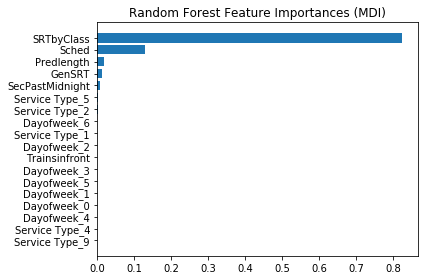

In [457]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

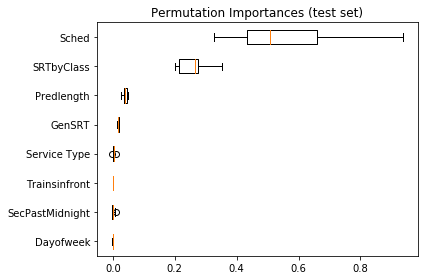

In [458]:
result = permutation_importance(rf, test_features, test_labels, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=test_features.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [103]:
result.importances_mean

array([ 9.40324406e-03,  3.98745635e-01,  7.58626929e-01,  1.59168255e-02,
       -2.23798438e-04, -1.02591140e-03, -2.20697045e-03,  1.46556255e-03])

In [104]:
#SRT=SRT_calculation(["/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191002freightinc.pickle"],r'[0-9][A-Z][0-9][0-9]')
#SRT1=SRT_calculation(["/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191002freightinc.pickle"],r'[1][A-Z][0-9][0-9]')
#SRT2=SRT_calculation(["/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191002freightinc.pickle"],r'[2][A-Z][0-9][0-9]')
#SRT5=SRT_calculation(["/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191002freightinc.pickle"],r'[5][A-Z][0-9][0-9]')
#SRT6=SRT_calculation(["/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191001freightinc.pickle","/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/20191002freightinc.pickle"],r'[6][A-Z][0-9][0-9]')
SRT

,Area,From,To,Headcode,UTC,msg_type,prev_from,prev_to,prev_RealUTC,Median,STD,Mean,ID,RealUTC,Time,prev_headcode
0,UR,0105,0107,2B00,064019,CA,A507,0105,2019-09-01 06:39:31,0 days 00:00:56,0 days 00:00:05.069522,0 days 00:00:56.072072,UR01050107,2019-09-01 06:40:19,00:00:48,2B00
1,UR,0106,R101,2B01,064231,CA,0108,0106,2019-09-01 06:42:18,0 days 00:00:19,0 days 00:00:27.818806,0 days 00:00:32.169696,UR0106R101,2019-09-01 06:42:31,00:00:13,2B01
2,UR,0106,R103,2D01,072459,CA,0108,0106,2019-09-01 07:21:53,0 days 00:00:18,0 days 00:00:25.724998,0 days 00:00:24.788079,UR0106R103,2019-09-01 07:24:59,00:03:06,2D01
3,UR,0106,R505,2B13,231415,CA,0108,0106,2019-09-01 23:13:58,0 days 00:00:17,0 days 00:00:09.359930,0 days 00:00:21.190476,UR0106R505,2019-09-01 23:14:15,00:00:17,2B13
4,UR,0106,R507,2D03,082144,CA,0108,0106,2019-09-01 08:21:28,0 days 00:00:34,0 days 00:00:19.605838,0 days 00:00:35,UR0106R507,2019-09-01 08:21:44,00:00:16,2D03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,UR,L921,L918,5L31,063537,CA,L913,L921,2019-09-05 06:32:58,0 days 00:02:39,NaT,0 days 00:02:39,URL921L918,2019-09-05 06:35:37,00:02:39,5L31
401,UR,L924,L920,2J01,212554,CA,0902,L924,2019-09-01 21:24:42,0 days 00:01:10,0 days 00:00:42.431437,0 days 00:01:07.448675,URL924L920,2019-09-01 21:25:54,00:01:12,2J01
402,UR,LG12,0888,4E08,032443,CA,B920,LS21,2019-09-03 04:40:20,0 days 22:59:23,0 days 00:22:12.695858,0 days 23:01:08.250000,URLG120888,2019-09-04 03:24:43,22:44:23,4E08
403,UR,LGSD,LSLG,4L00,012225,CA,0885,LG11,2019-09-03 01:20:39,0 days 00:01:53,0 days 00:02:04.049804,0 days 00:02:23.634615,URLGSDLSLG,2019-09-03 01:22:25,00:01:46,4L00


#Predict arrival time at requested TIPLOC with a given time horizon
#using the timetable

    #Set initial values and parameters
IntHeadcodes=[]
PredTime=np.array([])
PredSchedTT=np.array([])
ActTT=np.array([])
#Iterate through all headcodes on the line
for g in range(0,len(ThurHeadcodes)):
    Headcode=ThurHeadcodes[g]
    Train=ThurFdf[ThurFdf['Headcode']==Headcode].reset_index(drop=True)
    #Remove adjacent TIPLOC classifications
    for q in range(0,len(Train)-1):
        if Train['TIPLOC'][q]==Train['TIPLOC'][q+1]:
            Train.at[q+1,'TIPLOC']='UR'
    Train=Train[Train['Sched']!='None'].reset_index(drop=True)
    #Select trains that go to chosen TIPLOC
    for h in range(0,len(Train)):
        if Train['TIPLOC'][h]==TIPLOC:
            IntHeadcodes.append(Headcode)
IntHeadcodes=pd.Series(IntHeadcodes).unique()
#Iterate through new list of headcodes
for i in range(0,len(IntHeadcodes)):
    #Select relevant data
    OldTrain=ThurFdf[ThurFdf['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
    #Remove adjacent TIPLOC classifications
    for q in range(0,len(OldTrain)-1):
        if OldTrain['TIPLOC'][q]==OldTrain['TIPLOC'][q+1]:
            OldTrain.at[q+1,'TIPLOC']='UR'
            
    #Select relevant entry
    IntTIPLOC=OldTrain[OldTrain['TIPLOC']==TIPLOC].reset_index()
    if IntTIPLOC['index'][0]<randlist[i]:
        randlist[i]=IntTIPLOC['index'][0]
    NewTrain=OldTrain.iloc[IntTIPLOC['index'][0]-randlist[i]:IntTIPLOC['index'][0]+1].reset_index(drop=True)
    PredTrain=NewTrain
    
        #Compare actual travel time to the prediction and add to an array
    PredSchedTT=np.append(PredSchedTT,PredTrain['Sched'][len(PredTrain)-1]-PredTrain['RealUTC'][0])
    ActTT=np.append(ActTT,PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])
    PredTime=np.append(PredTime,abs((PredTrain['RealUTC'][len(PredTrain)-1]-PredTrain['RealUTC'][0])-(PredTrain['Sched'][len(PredTrain)-1]-PredTrain['RealUTC'][0])))
PredSchedTT

In [ ]:
#PredTrain

In [ ]:
i

In [ ]:
PredTT=Generic_SRT_TT_Pred(TIPLOC,Sep09Fdf,Sep02Fdf,Sep09Headcodes,SRT)
PredTT

In [ ]:
PredTTClass=SRT_by_class_TT_Pred(TIPLOC,Sep09Fdf,Sep02Fdf,Sep09Headcodes,SRT1,SRT2,SRT5,SRT6)
PredTTClass

In [754]:
randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))

PredSchedTT,ActTT,PredTrainDataf=Timetable_TT_Prediction(TIPLOC,Sep22Fdf,Sep22Headcodes,randlist)
randlistarray=np.array(randlist[0:len(ActTT)])
PredTTClass,PredTrainDf=SRT_by_class_TT_Pred(TIPLOC,Sep22Fdf,Sep08Fdf,Sep22Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTT=Generic_SRT_TT_Pred(TIPLOC,Sep22Fdf,Sep08Fdf,Sep22Headcodes,SRT,randlist)

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep23Fdf,Sep23Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep23Fdf,Sep16Fdf,Sep23Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep23Fdf,Sep16Fdf,Sep23Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep24Fdf,Sep24Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep24Fdf,Sep17Fdf,Sep24Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep24Fdf,Sep17Fdf,Sep24Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep25Fdf,Sep25Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep25Fdf,Sep18Fdf,Sep25Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep25Fdf,Sep18Fdf,Sep25Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep26Fdf,Sep26Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep26Fdf,Sep19Fdf,Sep26Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep26Fdf,Sep19Fdf,Sep26Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep27Fdf,Sep27Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep27Fdf,Sep20Fdf,Sep27Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep27Fdf,Sep20Fdf,Sep27Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep28Fdf,Sep28Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep28Fdf,Sep21Fdf,Sep28Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep28Fdf,Sep21Fdf,Sep28Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

In [808]:
randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))

PredSchedTT,ActTT,PredTrainDataf=Timetable_TT_Prediction(TIPLOC,Sep29Fdf,Sep29Headcodes,randlist)
randlistarray=np.array(randlist[0:len(ActTT)])
PredTTClass,PredTrainDf=SRT_by_class_TT_Pred(TIPLOC,Sep29Fdf,Sep22Fdf,Sep29Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTT=Generic_SRT_TT_Pred(TIPLOC,Sep29Fdf,Sep22Fdf,Sep29Headcodes,SRT,randlist)

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Sep30Fdf,Sep30Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Sep30Fdf,Sep23Fdf,Sep30Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Sep30Fdf,Sep23Fdf,Sep30Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Oct01Fdf,Oct01Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Oct01Fdf,Sep24Fdf,Oct01Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Oct01Fdf,Sep24Fdf,Oct01Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Oct02Fdf,Oct02Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Oct02Fdf,Sep25Fdf,Oct02Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Oct02Fdf,Sep25Fdf,Oct02Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Oct03Fdf,Oct03Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Oct03Fdf,Sep26Fdf,Oct03Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Oct03Fdf,Sep26Fdf,Oct03Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Oct04Fdf,Oct04Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Oct04Fdf,Sep27Fdf,Oct04Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Oct04Fdf,Sep27Fdf,Oct04Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

randlist=[]
for i in range(0,300):
    randlist.append(rm.randint(5,10))
a,b,c=Timetable_TT_Prediction(TIPLOC,Oct05Fdf,Oct05Headcodes,randlist)
PredTrainDataf=PredTrainDataf.append(c).reset_index(drop=True)
randlistarray=np.concatenate([randlistarray,randlist[0:len(b)]])
PredSchedTT=np.concatenate([PredSchedTT,a])
ActTT=np.concatenate([ActTT,b])
a,b=SRT_by_class_TT_Pred(TIPLOC,Oct05Fdf,Sep28Fdf,Oct05Headcodes,SRT1,SRT2,SRT5,SRT6,randlist)
PredTTClass=np.concatenate([PredTTClass,a])
PredTrainDf=PredTrainDf.append(b).reset_index(drop=True)
a=Generic_SRT_TT_Pred(TIPLOC,Oct05Fdf,Sep28Fdf,Oct05Headcodes,SRT,randlist)
PredTT=np.concatenate([PredTT,a])

In [231]:
Oct01Fdf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched
0,040033,UR,CA,0667,0669,4L80,2019-10-01 04:00:33,UR,UR,UR
1,040040,UR,CA,0862,0860,6J25,2019-10-01 04:00:40,UR,UR,UR
2,040115,UR,CA,0669,0671,4L80,2019-10-01 04:01:15,UR,UR,UR
3,040116,UR,CA,0350,0348,5D01,2019-10-01 04:01:16,UR,UR,UR
4,040207,UR,CA,0671,0673,4L80,2019-10-01 04:02:07,UR,UR,UR
...,...,...,...,...,...,...,...,...,...,...
30557,035839,UR,CA,0588,0350,5D01,2019-10-02 03:58:39,UR,UR,UR
30558,035844,UR,CA,0669,0671,4L80,2019-10-02 03:58:44,UR,UR,UR
30559,035914,UR,CA,0671,0673,4L80,2019-10-02 03:59:14,UR,UR,UR
30560,035924,UR,CA,1055,R596,5B51,2019-10-02 03:59:24,SHBRYNS,98,2019-10-01 04:00:00


In [232]:
PredTrainDataf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched
0,062709,UR,CA,0196,0194,2B01,2019-09-29 06:27:09,UR,UR,UR
1,070727,UR,CA,0190,0188,2D99,2019-09-29 07:07:27,UR,UR,UR
2,065556,UR,CA,0194,0192,2B03,2019-09-29 06:55:56,UR,UR,UR
3,071037,UR,CA,0194,0192,2B05,2019-09-29 07:10:37,UR,UR,UR
4,074744,UR,CA,0194,0192,2D01,2019-09-29 07:47:44,UR,UR,UR
...,...,...,...,...,...,...,...,...,...,...
1209,232605,UR,CA,0192,0190,2B73,2019-10-05 23:26:05,UR,UR,UR
1210,235111,UR,CA,0182,0180,2D75,2019-10-05 23:51:11,UR,UR,UR
1211,235722,UR,CA,0182,0180,2B75,2019-10-05 23:57:22,UR,UR,UR
1212,001530,UR,CA,0194,0192,2B77,2019-10-06 00:15:30,UR,UR,UR


In [233]:
PredTrainDf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched,PredUTC
0,062709,UR,CA,0196,0194,2B01,2019-09-29 06:27:09,UR,UR,UR,2019-09-29 06:27:09
1,070727,UR,CA,0190,0188,2D99,2019-09-29 07:07:27,UR,UR,UR,2019-09-29 07:07:27
2,065556,UR,CA,0194,0192,2B03,2019-09-29 06:55:56,UR,UR,UR,2019-09-29 06:55:56
3,071037,UR,CA,0194,0192,2B05,2019-09-29 07:10:37,UR,UR,UR,2019-09-29 07:10:37
4,074744,UR,CA,0194,0192,2D01,2019-09-29 07:47:44,UR,UR,UR,2019-09-29 07:47:44
...,...,...,...,...,...,...,...,...,...,...,...
1209,232605,UR,CA,0192,0190,2B73,2019-10-05 23:26:05,UR,UR,UR,2019-10-05 23:26:05
1210,235111,UR,CA,0182,0180,2D75,2019-10-05 23:51:11,UR,UR,UR,2019-10-05 23:51:11
1211,235722,UR,CA,0182,0180,2B75,2019-10-05 23:57:22,UR,UR,UR,2019-10-05 23:57:22
1212,001530,UR,CA,0194,0192,2B77,2019-10-06 00:15:30,UR,UR,UR,2019-10-06 00:15:30


In [809]:
ActTT=pd.Series(ActTT).astype('timedelta64[s]')
PredTT=pd.Series(PredTT).astype('timedelta64[s]')
PredTTClass=pd.Series(PredTTClass).astype('timedelta64[s]')
PredSchedTT=pd.Series(PredSchedTT).astype('timedelta64[s]')

In [810]:
PredTrainDf['Date']=PredTrainDf['Area']
q=0
for i in range(0,len(PredTrainDf)):
    if int(str(PredTrainDf['RealUTC'][i])[11:13]+str(PredTrainDf['RealUTC'][i])[14:16])<400:
        q=q+1
        PredTrainDf.at[i,'RealUTC']=PredTrainDf['RealUTC'][i]-timedelta(days=1)
        PredTrainDf.at[i,'Date']=str(PredTrainDf['RealUTC'][i])[0:10]
        PredTrainDf.at[i,'RealUTC']=PredTrainDf['RealUTC'][i]+timedelta(days=1)
    else:
        PredTrainDf.at[i,'Date']=str(PredTrainDf['RealUTC'][i])[0:10]
PredTrainDf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched,PredUTC,Date
0,062930,UR,CA,0182,0180,2B01,2019-09-29 06:29:30,UR,UR,UR,2019-09-29 06:29:30,2019-09-29
1,070754,UR,CA,0188,0182,2D99,2019-09-29 07:07:54,UR,UR,UR,2019-09-29 07:07:54,2019-09-29
2,065630,UR,CA,0192,0190,2B03,2019-09-29 06:56:30,UR,UR,UR,2019-09-29 06:56:30,2019-09-29
3,071112,UR,CA,0192,0190,2B05,2019-09-29 07:11:12,UR,UR,UR,2019-09-29 07:11:12,2019-09-29
4,074744,UR,CA,0194,0192,2D01,2019-09-29 07:47:44,UR,UR,UR,2019-09-29 07:47:44,2019-09-29
...,...,...,...,...,...,...,...,...,...,...,...,...
1209,232605,UR,CA,0192,0190,2B73,2019-10-05 23:26:05,UR,UR,UR,2019-10-05 23:26:05,2019-10-05
1210,234849,UR,CA,0196,0194,2D75,2019-10-05 23:48:49,UR,UR,UR,2019-10-05 23:48:49,2019-10-05
1211,235622,UR,CA,0190,0188,2B75,2019-10-05 23:56:22,UR,UR,UR,2019-10-05 23:56:22,2019-10-05
1212,001530,UR,CA,0194,0192,2B77,2019-10-06 00:15:30,UR,UR,UR,2019-10-06 00:15:30,2019-10-05


In [811]:
PredTrainDf['Trainsinfront']=PredTrainDf['Area']
StartDate=PredTrainDf['Date'][0]
for i in range(0,7):
    ConcertinaDf=Pickle_read("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/Data_pickles/"+StartDate+"Concertina.pickle")
    for j in range(0,len(PredTrainDf)):
        if PredTrainDf['Date'][j]==StartDate:
            temp=ConcertinaDf[ConcertinaDf['Headcode2']==PredTrainDf['Headcode'][j]].reset_index(drop=True)
            if len(temp)==0:
                PredTrainDf.at[j,'Trainsinfront']=0
            elif temp['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp['Endtime'][0]:
                PredTrainDf.at[j,'Trainsinfront']=1
                temp2=ConcertinaDf[ConcertinaDf['Headcode2']==temp['Headcode1'][0]].reset_index(drop=True)
                if len(temp2)!=0:
                    if temp2['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp2['Endtime'][0]:
                        PredTrainDf.at[j,'Trainsinfront']=2
                        temp3=ConcertinaDf[ConcertinaDf['Headcode2']==temp2['Headcode1'][0]].reset_index(drop=True)
                        if len(temp3)!=0:
                            if temp3['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp3['Endtime'][0]:
                                PredTrainDf.at[j,'Trainsinfront']=3
                                temp4=ConcertinaDf[ConcertinaDf['Headcode2']==temp3['Headcode1'][0]].reset_index(drop=True)
                                if len(temp4)!=0:
                                    if temp4['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp4['Endtime'][0]:
                                        PredTrainDf.at[j,'Trainsinfront']=4
                                        temp5=ConcertinaDf[ConcertinaDf['Headcode2']==temp4['Headcode1'][0]].reset_index(drop=True)
                                        if len(temp5)!=0:
                                            if temp5['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp5['Endtime'][0]:
                                                PredTrainDf.at[j,'Trainsinfront']=5
                                                temp6=ConcertinaDf[ConcertinaDf['Headcode2']==temp5['Headcode1'][0]].reset_index(drop=True)
                                                if len(temp6)!=0:
                                                    if temp6['Starttime'][0]<=PredTrainDf['RealUTC'][j]<=temp6['Endtime'][0]:
                                                        PredTrainDf.at[j,'Trainsinfront']=6
            else:
                PredTrainDf.at[j,'Trainsinfront']=0
    StartDate=datetime.strptime(StartDate,'%Y-%m-%d')
    StartDate=StartDate+timedelta(days=1)
    StartDate=str(StartDate)[0:10]
PredTrainDf

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched,PredUTC,Date,Trainsinfront
0,062930,UR,CA,0182,0180,2B01,2019-09-29 06:29:30,UR,UR,UR,2019-09-29 06:29:30,2019-09-29,0
1,070754,UR,CA,0188,0182,2D99,2019-09-29 07:07:54,UR,UR,UR,2019-09-29 07:07:54,2019-09-29,0
2,065630,UR,CA,0192,0190,2B03,2019-09-29 06:56:30,UR,UR,UR,2019-09-29 06:56:30,2019-09-29,0
3,071112,UR,CA,0192,0190,2B05,2019-09-29 07:11:12,UR,UR,UR,2019-09-29 07:11:12,2019-09-29,0
4,074744,UR,CA,0194,0192,2D01,2019-09-29 07:47:44,UR,UR,UR,2019-09-29 07:47:44,2019-09-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,232605,UR,CA,0192,0190,2B73,2019-10-05 23:26:05,UR,UR,UR,2019-10-05 23:26:05,2019-10-05,0
1210,234849,UR,CA,0196,0194,2D75,2019-10-05 23:48:49,UR,UR,UR,2019-10-05 23:48:49,2019-10-05,0
1211,235622,UR,CA,0190,0188,2B75,2019-10-05 23:56:22,UR,UR,UR,2019-10-05 23:56:22,2019-10-05,0
1212,001530,UR,CA,0194,0192,2B77,2019-10-06 00:15:30,UR,UR,UR,2019-10-06 00:15:30,2019-10-05,0


In [822]:
PredTrainDf[PredTrainDf['Trainsinfront']==0]

,UTC,Area,msg_type,From,To,Headcode,RealUTC,TIPLOC,Offset,Sched,PredUTC,Date,Trainsinfront
0,062930,UR,CA,0182,0180,2B01,2019-09-29 06:29:30,UR,UR,UR,2019-09-29 06:29:30,2019-09-29,0
1,070754,UR,CA,0188,0182,2D99,2019-09-29 07:07:54,UR,UR,UR,2019-09-29 07:07:54,2019-09-29,0
2,065630,UR,CA,0192,0190,2B03,2019-09-29 06:56:30,UR,UR,UR,2019-09-29 06:56:30,2019-09-29,0
3,071112,UR,CA,0192,0190,2B05,2019-09-29 07:11:12,UR,UR,UR,2019-09-29 07:11:12,2019-09-29,0
4,074744,UR,CA,0194,0192,2D01,2019-09-29 07:47:44,UR,UR,UR,2019-09-29 07:47:44,2019-09-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,232605,UR,CA,0192,0190,2B73,2019-10-05 23:26:05,UR,UR,UR,2019-10-05 23:26:05,2019-10-05,0
1210,234849,UR,CA,0196,0194,2D75,2019-10-05 23:48:49,UR,UR,UR,2019-10-05 23:48:49,2019-10-05,0
1211,235622,UR,CA,0190,0188,2B75,2019-10-05 23:56:22,UR,UR,UR,2019-10-05 23:56:22,2019-10-05,0
1212,001530,UR,CA,0194,0192,2B77,2019-10-06 00:15:30,UR,UR,UR,2019-10-06 00:15:30,2019-10-05,0


In [824]:
1137/1214*100

93.65733113673805

In [812]:
PredTrain=PredTrainDf.copy()
del PredTrain['Area']
del PredTrain['UTC']
del PredTrain['TIPLOC']
del PredTrain['Offset']
del PredTrain['Sched']
del PredTrain['PredUTC']
del PredTrain['msg_type']
PredTrain['Service Type']=PredTrain['Headcode'].str.slice(0,1)
del PredTrain['Headcode']
PredTrain['Weekday']=PredTrain['RealUTC'].dt.weekday
PredTrain['Dayofweek']=PredTrain['Service Type']
for i in range(0,len(PredTrain)):
    PredTrain.at[i,'Dayofweek']=str(PredTrain['Weekday'][i])
PredTrain['SecPastMidnight']=PredTrain['Weekday']
for i in range(0,len(PredTrain)):
    PredTrain.at[i,'SecPastMidnight']=int(str(PredTrain['RealUTC'][i])[11:13])*3600+int(str(PredTrain['RealUTC'][i])[14:16])*60+int(str(PredTrain['RealUTC'][i])[17:19])
del PredTrain['Weekday']
del PredTrain['Date']
PredTrain

,From,To,RealUTC,Trainsinfront,Service Type,Dayofweek,SecPastMidnight
0,0182,0180,2019-09-29 06:29:30,0,2,6,23370
1,0188,0182,2019-09-29 07:07:54,0,2,6,25674
2,0192,0190,2019-09-29 06:56:30,0,2,6,24990
3,0192,0190,2019-09-29 07:11:12,0,2,6,25872
4,0194,0192,2019-09-29 07:47:44,0,2,6,28064
...,...,...,...,...,...,...,...
1209,0192,0190,2019-10-05 23:26:05,0,2,5,84365
1210,0196,0194,2019-10-05 23:48:49,0,2,5,85729
1211,0190,0188,2019-10-05 23:56:22,0,2,5,86182
1212,0194,0192,2019-10-06 00:15:30,0,2,6,930


In [813]:
ActUTC=np.array([])
PredUTC=[]
for i in range(0,len(ActTT)):
    ActUTC=np.append(ActUTC,ActTT[i])
    PredUTC.append(tuple([PredTT[i],PredTTClass[i],PredSchedTT[i],randlistarray[i]]))
PredUTC

[(125.0, 122.0, -30.0, 5),
 (0.0, 0.0, 186.0, 6),
 (211.0, 207.0, 150.0, 8),
 (211.0, 207.0, 228.0, 8),
 (245.0, 240.0, 316.0, 9),
 (0.0, 0.0, 48.0, 8),
 (183.0, 180.0, 85.0, 7),
 (268.0, 263.0, -78.0, 10),
 (0.0, 0.0, 162.0, 6),
 (211.0, 207.0, 280.0, 8),
 (125.0, 122.0, 75.0, 5),
 (155.0, 152.0, -7.0, 6),
 (0.0, 0.0, 377.0, 7),
 (986.0, 107.0, 193.0, 5),
 (125.0, 122.0, 174.0, 5),
 (0.0, 0.0, 442.0, 7),
 (0.0, 0.0, 192.0, 8),
 (125.0, 122.0, 148.0, 5),
 (0.0, 0.0, 1013.0, 8),
 (1076.0, 172.0, 246.0, 8),
 (125.0, 122.0, 192.0, 5),
 (0.0, 0.0, 386.0, 7),
 (0.0, 0.0, 281.0, 9),
 (245.0, 240.0, 305.0, 9),
 (0.0, 0.0, 1047.0, 8),
 (1014.0, 129.0, 118.0, 6),
 (125.0, 122.0, 193.0, 5),
 (0.0, 0.0, 341.0, 7),
 (0.0, 0.0, 130.0, 5),
 (211.0, 207.0, 270.0, 8),
 (0.0, 0.0, 1082.0, 8),
 (1098.0, 193.0, 290.0, 9),
 (268.0, 263.0, 342.0, 10),
 (0.0, 0.0, 386.0, 7),
 (0.0, 0.0, 316.0, 10),
 (245.0, 240.0, 338.0, 9),
 (0.0, 0.0, 1062.0, 8),
 (1042.0, 150.0, 223.0, 7),
 (268.0, 263.0, 341.0, 10),
 (0

In [814]:
RandomForestDf=pd.DataFrame(columns=['GenSRT','SRTbyClass','Sched','Predlength'],data=PredUTC)
RandomForestDf['Actual']=ActUTC
RandomForestDf['Service Type']=PredTrain['Service Type']
RandomForestDf['Dayofweek']=PredTrain['Dayofweek']
RandomForestDf['SecPastMidnight']=PredTrain['SecPastMidnight']
RandomForestDf['Trainsinfront']=PredTrain['Trainsinfront']
RandomForestDf

,GenSRT,SRTbyClass,Sched,Predlength,Actual,Service Type,Dayofweek,SecPastMidnight,Trainsinfront
0,125.0,122.0,-30.0,5,114.0,2,6,23370,0
1,0.0,0.0,186.0,6,150.0,2,6,25674,0
2,211.0,207.0,150.0,8,216.0,2,6,24990,0
3,211.0,207.0,228.0,8,207.0,2,6,25872,0
4,245.0,240.0,316.0,9,238.0,2,6,28064,0
...,...,...,...,...,...,...,...,...,...
1209,211.0,207.0,205.0,8,196.0,2,5,84365,0
1210,268.0,263.0,191.0,10,267.0,2,5,85729,0
1211,183.0,180.0,128.0,7,185.0,2,5,86182,0
1212,245.0,240.0,-86190.0,9,223.0,2,6,930,0


In [761]:
categorical_columns=['Service Type','Dayofweek']
numerical_columns=['SecPastMidnight','GenSRT','SRTbyClass','Sched','Predlength','Trainsinfront']
labels=np.array(RandomForestDf['Actual'])
RandomForestDf=RandomForestDf.drop('Actual', axis=1)
Feature_list=list(RandomForestDf.columns)

In [467]:
train_features,test_features,train_labels,test_labels=train_test_split(RandomForestDf,labels,test_size=0.99,random_state=42)

In [468]:
predictions=rf.predict(test_features)
errors=abs(predictions-test_labels)
round(np.mean(errors),2)

21.41

In [469]:
round(np.median(errors),2)

10.67

In [497]:
np.std(errors)

39.757175753215556

In [470]:
RandomForestDf

,GenSRT,SRTbyClass,Sched,Predlength,Service Type,Dayofweek,SecPastMidnight,Trainsinfront
0,268.0,263.0,111.0,10,2,6,23229,0
1,0.0,0.0,241.0,8,2,6,25619,0
2,183.0,180.0,121.0,7,2,6,25019,0
3,183.0,180.0,202.0,7,2,6,25898,0
4,125.0,122.0,198.0,5,2,6,28182,0
...,...,...,...,...,...,...,...,...
1209,183.0,180.0,178.0,7,2,5,84392,0
1210,268.0,263.0,191.0,10,2,5,85729,0
1211,155.0,152.0,100.0,6,2,5,86210,0
1212,125.0,122.0,-86308.0,5,2,6,1048,0


In [815]:
#Regression model

ActUTC=np.array([])
PredUTC=[]
for i in range(0,len(ActTT)):
    ActUTC=np.append(ActUTC,ActTT[i])
    PredUTC.append(tuple([RandomForestDf['SRTbyClass'][i],RandomForestDf['GenSRT'][i],RandomForestDf['Service Type'][i],RandomForestDf['Trainsinfront'][i],RandomForestDf['Sched'][i]]))#,RandomForestDf['SecPastMidnight'][i]]))#RandomForestDf['Dayofweek'][i]]))#,RandomForestDf['Predlength'][i]])),RandomForestDf['Dayofweek'][i],RandomForestDf['SecPastMidnight'][i],RandomForestDf['Trainsinfront'][i],RandomForestDf['Sched'][i]]))
x=PredUTC#.reshape((-1,1))
y_pred=model.predict(x)
y_pred

/home/mathsys1/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([138.37237945,  22.78427935, 219.0226643 , ..., 193.44765501,
       235.05725579, 215.18544944])

In [246]:
x

[(268.0, 263.0, 111.0, 10, '2', '6', 23229, 0),
 (0.0, 0.0, 213.0, 7, '2', '6', 25647, 0),
 (245.0, 240.0, 184.0, 9, '2', '6', 24956, 0),
 (245.0, 240.0, 263.0, 9, '2', '6', 25837, 0),
 (245.0, 240.0, 316.0, 9, '2', '6', 28064, 0),
 (0.0, 0.0, -36.0, 5, '2', '6', 27936, 0),
 (245.0, 240.0, 145.0, 9, '2', '6', 30035, 0),
 (155.0, 152.0, -188.0, 6, '2', '6', 29888, 0),
 (0.0, 0.0, 140.0, 5, '2', '6', 28660, 0),
 (155.0, 152.0, 222.0, 6, '2', '6', 31758, 0),
 (155.0, 152.0, 105.0, 6, '2', '6', 31395, 0),
 (211.0, 207.0, 47.0, 8, '2', '6', 33733, 0),
 (0.0, 0.0, 1154.0, 10, '2', '6', 30046, 0),
 (986.0, 107.0, 193.0, 5, '9', '6', 34007, 0),
 (268.0, 263.0, 317.0, 10, '2', '6', 35263, 0),
 (0.0, 0.0, 1119.0, 8, '2', '6', 31941, 0),
 (0.0, 0.0, 192.0, 8, '1', '6', 35748, 0),
 (183.0, 180.0, 207.0, 7, '2', '6', 37173, 0),
 (0.0, 0.0, 336.0, 7, '2', '6', 34464, 0),
 (986.0, 107.0, 159.0, 5, '9', '6', 37641, 0),
 (183.0, 180.0, 251.0, 7, '2', '6', 38929, 0),
 (0.0, 0.0, 1061.0, 8, '2', '6', 355

In [247]:
len(randlistarray)

1214

In [248]:
len(ActTT)

1214

In [249]:
len(PredSchedTT)

1214

In [250]:
len(PredTT)

1214

In [251]:
len(PredTTClass)

1214

In [252]:
x

[(268.0, 263.0, 111.0, 10, '2', '6', 23229, 0),
 (0.0, 0.0, 213.0, 7, '2', '6', 25647, 0),
 (245.0, 240.0, 184.0, 9, '2', '6', 24956, 0),
 (245.0, 240.0, 263.0, 9, '2', '6', 25837, 0),
 (245.0, 240.0, 316.0, 9, '2', '6', 28064, 0),
 (0.0, 0.0, -36.0, 5, '2', '6', 27936, 0),
 (245.0, 240.0, 145.0, 9, '2', '6', 30035, 0),
 (155.0, 152.0, -188.0, 6, '2', '6', 29888, 0),
 (0.0, 0.0, 140.0, 5, '2', '6', 28660, 0),
 (155.0, 152.0, 222.0, 6, '2', '6', 31758, 0),
 (155.0, 152.0, 105.0, 6, '2', '6', 31395, 0),
 (211.0, 207.0, 47.0, 8, '2', '6', 33733, 0),
 (0.0, 0.0, 1154.0, 10, '2', '6', 30046, 0),
 (986.0, 107.0, 193.0, 5, '9', '6', 34007, 0),
 (268.0, 263.0, 317.0, 10, '2', '6', 35263, 0),
 (0.0, 0.0, 1119.0, 8, '2', '6', 31941, 0),
 (0.0, 0.0, 192.0, 8, '1', '6', 35748, 0),
 (183.0, 180.0, 207.0, 7, '2', '6', 37173, 0),
 (0.0, 0.0, 336.0, 7, '2', '6', 34464, 0),
 (986.0, 107.0, 159.0, 5, '9', '6', 37641, 0),
 (183.0, 180.0, 251.0, 7, '2', '6', 38929, 0),
 (0.0, 0.0, 1061.0, 8, '2', '6', 355

In [818]:
Regdiff=y_pred-ActTT
Scheddiff=PredSchedTT-ActTT
Gendiff=PredTT-ActTT
Classdiff=PredTTClass-ActTT
for i in range(0,len(ActTT)):
    if (abs(Regdiff[i])-Regdiff.mean())>3*np.std(Regdiff):
        Regdiff=Regdiff.drop(i)
    if (abs(Scheddiff[i])-Scheddiff.mean())>3*np.std(Scheddiff):
        Scheddiff=Scheddiff.drop(i)
    if (abs(Gendiff[i])-Gendiff.mean())>3*np.std(Gendiff):
        Gendiff=Gendiff.drop(i)
    if (abs(Classdiff[i])-Classdiff.mean())>3*np.std(Classdiff):
        Classdiff=Classdiff.drop(i)

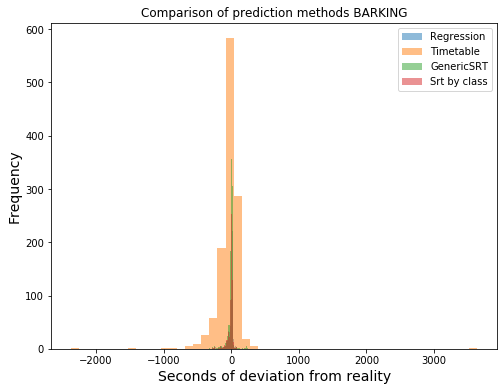

In [819]:
plt.figure(figsize=(8,6))
Regdiff.plot.hist(bins=50,label='Regression',alpha=0.5)
Scheddiff.plot.hist(bins=50,label='Timetable',alpha=0.5)
Gendiff.plot.hist(bins=50,label='GenericSRT',alpha=0.5)
Classdiff.plot.hist(bins=50,label='Srt by class',alpha=0.5)
plt.xlabel("Seconds of deviation from reality", size=14)
plt.ylabel("Frequency", size=14)
plt.title("Comparison of prediction methods "+TIPLOC)
plt.legend(loc='upper right')

In [816]:
sklearn.metrics.median_absolute_error(y_pred,ActTT)

19.770078961305117

In [ ]:
16.24

In [817]:
sklearn.metrics.mean_absolute_error(y_pred,ActTT)

45.891554797365174

In [ ]:
30.50

In [475]:
sklearn.metrics.median_absolute_error(PredTTClass,ActTT)

12.0

In [479]:
sklearn.metrics.mean_absolute_error(PredTTClass,ActTT)

44.91268533772652

In [476]:
sklearn.metrics.median_absolute_error(PredTT,ActTT)

14.0

In [480]:
sklearn.metrics.mean_absolute_error(PredTT,ActTT)

77.78583196046128

In [477]:
sklearn.metrics.median_absolute_error(PredSchedTT,ActTT)

61.5

In [481]:
sklearn.metrics.mean_absolute_error(PredSchedTT,ActTT)

1874.2718286655684

In [489]:
np.std(Classdiff)

45.310404214640535

In [490]:
np.std(Gendiff)

55.41199843764064

In [821]:
np.std(Regdiff)

44.68558510609026

In [492]:
np.std(Scheddiff)

191.494824985695

In [488]:
RandomForestDf.sort_values(by=['Sched'])

,GenSRT,SRTbyClass,Sched,Predlength,Service Type,Dayofweek,SecPastMidnight,Trainsinfront
1103,0.0,0.0,-87460.0,6,4,5,13960,0
893,183.0,180.0,-86386.0,7,2,4,916,0
293,268.0,263.0,-86350.0,10,2,1,910,0
895,155.0,152.0,-86321.0,6,2,4,581,0
1212,125.0,122.0,-86308.0,5,2,6,1048,0
...,...,...,...,...,...,...,...,...
462,977.0,827.0,1219.0,9,5,1,70211,0
864,977.0,827.0,1221.0,9,5,3,70209,0
577,951.0,965.0,1268.0,8,2,2,38542,0
178,1027.0,1045.0,1408.0,10,2,0,38432,0


In [ ]:
#Random Forest Regression Model
Fdf=Sep08Fdf[Sep08Fdf['TIPLOC']==TIPLOC].reset_index(drop=True)
IntHeadcodes=Fdf['Headcodes'].unique()
for i in range(0,len(IntHeadcodes)):
        OldTrain=ToData[ToData['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
        #Remove the second TIPLOC reference for adjacent entries
        for q in range(0,len(OldTrain)-1):
            if OldTrain['TIPLOC'][q]==OldTrain['TIPLOC'][q+1]:
                OldTrain.at[q+1,'TIPLOC']='UR'
        #Find the berth of interest
        IntTIPLOC=OldTrain[OldTrain['TIPLOC']==TIPLOC].reset_index(drop=True)
        ZeroHour=IntTIPLOC['RealUTC'][0]
        #Find data for before the berth of interest
        Train=OldTrain[OldTrain['RealUTC']<ZeroHour-TimeHorizon].reset_index(drop=True)
        YesterTrain=YesterData[YesterData['Headcode']==IntHeadcodes[i]].reset_index(drop=True)
Fdf

In [295]:
TuesDf=Pickle_read("/home/mathsys1/Documents/MathSys/Network_rail_data_analysis/Data_pickles/20191001Df.pickle")

In [296]:
q=0
p=0
for i in range(0,len(TuesDf)):
    if str(TuesDf['Sched'][i])[9:10]=='1':
        p=p+1
        if int(str(TuesDf['Sched'][i])[11:13]+str(TuesDf['Sched'][i])[14:16])<=400:
            TuesDf.at[i,'Sched']=TuesDf['Sched'][i]+timedelta(days=1)
            q=q+1 
TuesDf

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC
0,UR,0667,0669,4L80,UR,0,2019-10-02 04:00:33,0 days 00:00:00,2019-10-01 04:00:33,2019-10-01 04:00:33
1,UR,0669,0671,4L80,UR,0,2019-10-01 04:01:15,0 days 00:00:00,2019-10-01 04:01:15,2019-10-01 04:01:15
2,UR,0671,0673,4L80,GRAYS,51,2019-10-01 04:09:30,-1 days +23:53:28,2019-10-01 04:02:07,2019-10-01 04:02:58
3,UR,0673,0675,4L80,GRAYS,-10,2019-10-01 04:09:30,-1 days +23:53:08,2019-10-01 04:02:48,2019-10-01 04:02:38
4,UR,0885,LG11,4L80,UR,0,2019-10-01 04:18:36,0 days 00:00:00,2019-10-01 04:18:36,2019-10-01 04:18:36
...,...,...,...,...,...,...,...,...,...,...
31451,UR,0610,0604,4M83,BARKING,0,2019-10-02 03:35:00,0 days 23:49:07,2019-10-02 03:24:07,2019-10-02 03:24:07
31452,UR,0604,L924,4M83,UR,0,2019-10-02 03:25:12,0 days 00:00:00,2019-10-02 03:25:12,2019-10-02 03:25:12
31453,UR,L924,L920,4M83,UR,0,2019-10-02 03:26:09,0 days 00:00:00,2019-10-02 03:26:09,2019-10-02 03:26:09
31454,UR,B920,LS21,4M83,UR,0,2019-10-02 03:26:47,0 days 00:00:00,2019-10-02 03:26:47,2019-10-02 03:26:47


In [297]:
q

301

In [298]:
#str(TuesDf['Sched'][28938])[9:10]

In [299]:
#int(str(TuesDf['Sched'][28938])[11:13]+str(TuesDf['Sched'][28938])[14:16])<400

In [300]:
TueShoe=TuesDf[TuesDf['TIPLOC']=='SHBRYNS'].reset_index(drop=True)
TueShoe['Seconds']=TueShoe['Offset']
for i in range (0,len(TueShoe)):
    TueShoe.at[i,'Delay']=TueShoe['AdjUTC'][i]-TueShoe['Sched'][i]
    TueShoe.at[i,'Seconds']=TueShoe['Delay'][i]/np.timedelta64(1,'s')
TueShoe

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC,Seconds
0,UR,1055,R354,5B53,SHBRYNS,165,2019-10-01 04:05:00,0 days 00:02:32,2019-10-01 04:04:47,2019-10-01 04:07:32,152
1,UR,1053,R592,5B55,SHBRYNS,60,2019-10-01 04:10:00,0 days 00:02:11,2019-10-01 04:11:11,2019-10-01 04:12:11,131
2,UR,A596,0352,2B51,SHBRYNS,-36,2019-10-01 04:15:00,0 days 00:00:00,2019-10-01 04:15:36,2019-10-01 04:15:00,0
3,UR,A354,0352,2B53,SHBRYNS,-26,2019-10-01 04:59:00,0 days 00:00:17,2019-10-01 04:59:43,2019-10-01 04:59:17,17
4,UR,0353,R354,2B50,SHBRYNS,94,2019-10-01 06:03:00,0 days 00:02:05,2019-10-01 06:03:31,2019-10-01 06:05:05,125
...,...,...,...,...,...,...,...,...,...,...,...
233,UR,A592,SBCE,5S55,SHBRYNS,0,2019-10-02 00:59:00,-1 days +23:59:04,2019-10-02 00:58:04,2019-10-02 00:58:04,-56
234,UR,0353,R596,5Z89,SHBRYNS,98,2019-10-02 01:58:00,0 days 00:01:14,2019-10-02 01:57:36,2019-10-02 01:59:14,74
235,UR,A592,SBCE,5S59,SHBRYNS,0,2019-10-02 01:29:00,-1 days +23:59:12,2019-10-02 01:28:12,2019-10-02 01:28:12,-48
236,UR,A596,SBCE,5S63,SHBRYNS,-31,2019-10-02 01:47:00,-1 days +23:58:11,2019-10-02 01:45:42,2019-10-02 01:45:11,-109


In [301]:
ArrA=TueShoe[TueShoe['To']=='R596'].reset_index(drop=True)
ArrB=TueShoe[TueShoe['To']=='R354'].reset_index(drop=True)
ArrC=TueShoe[TueShoe['To']=='R592'].reset_index(drop=True)
ShoeArr=ArrA.append(ArrB).reset_index(drop=True)
ShoeArr=ShoeArr.append(ArrC).reset_index(drop=True)
ShoeArr=ShoeArr.sort_values(by=['NewUTC'],ascending=True).reset_index(drop=True)
ShoeArr

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC,Seconds
0,UR,1055,R354,5B53,SHBRYNS,165,2019-10-01 04:05:00,0 days 00:02:32,2019-10-01 04:04:47,2019-10-01 04:07:32,152
1,UR,1053,R592,5B55,SHBRYNS,60,2019-10-01 04:10:00,0 days 00:02:11,2019-10-01 04:11:11,2019-10-01 04:12:11,131
2,UR,1055,R354,5B57,SHBRYNS,165,2019-10-01 05:21:00,-1 days +23:57:33,2019-10-01 05:15:48,2019-10-01 05:18:33,-147
3,UR,0353,R596,3B02,SHBRYNS,98,2019-10-01 05:24:00,-1 days +23:59:11,2019-10-01 05:21:33,2019-10-01 05:23:11,-49
4,UR,1055,R592,5B01,SHBRYNS,60,2019-10-01 05:27:00,-1 days +23:55:53,2019-10-01 05:21:53,2019-10-01 05:22:53,-247
...,...,...,...,...,...,...,...,...,...,...,...
113,UR,0353,R592,2B46,SHBRYNS,83,2019-10-02 01:22:00,-1 days +23:59:29,2019-10-02 01:20:06,2019-10-02 01:21:29,-31
114,UR,0353,R596,2B48,SHBRYNS,98,2019-10-02 01:38:00,0 days 00:00:32,2019-10-02 01:36:54,2019-10-02 01:38:32,32
115,UR,0353,R354,1D93,SHBRYNS,94,2019-10-02 01:51:00,-1 days +23:58:39,2019-10-02 01:48:05,2019-10-02 01:49:39,-81
116,UR,0353,R596,5Z89,SHBRYNS,98,2019-10-02 01:58:00,0 days 00:01:14,2019-10-02 01:57:36,2019-10-02 01:59:14,74


In [302]:
ShoeArr.iloc[0:60]

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC,Seconds
0,UR,1055,R354,5B53,SHBRYNS,165,2019-10-01 04:05:00,0 days 00:02:32,2019-10-01 04:04:47,2019-10-01 04:07:32,152
1,UR,1053,R592,5B55,SHBRYNS,60,2019-10-01 04:10:00,0 days 00:02:11,2019-10-01 04:11:11,2019-10-01 04:12:11,131
2,UR,1055,R354,5B57,SHBRYNS,165,2019-10-01 05:21:00,-1 days +23:57:33,2019-10-01 05:15:48,2019-10-01 05:18:33,-147
3,UR,0353,R596,3B02,SHBRYNS,98,2019-10-01 05:24:00,-1 days +23:59:11,2019-10-01 05:21:33,2019-10-01 05:23:11,-49
4,UR,1055,R592,5B01,SHBRYNS,60,2019-10-01 05:27:00,-1 days +23:55:53,2019-10-01 05:21:53,2019-10-01 05:22:53,-247
5,UR,1053,R354,5B59,SHBRYNS,60,2019-10-01 05:35:00,-1 days +23:56:54,2019-10-01 05:30:54,2019-10-01 05:31:54,-186
6,UR,1053,R354,5B61,SHBRYNS,60,2019-10-01 05:49:00,-1 days +23:59:05,2019-10-01 05:47:05,2019-10-01 05:48:05,-55
7,UR,1053,R596,5B03,SHBRYNS,98,2019-10-01 05:54:00,0 days 00:01:45,2019-10-01 05:54:07,2019-10-01 05:55:45,105
8,UR,1055,R592,5B63,SHBRYNS,60,2019-10-01 14:03:00,-1 days +16:00:38,2019-10-01 06:02:38,2019-10-01 06:03:38,-28762
9,UR,0353,R354,2B50,SHBRYNS,94,2019-10-01 06:03:00,0 days 00:02:05,2019-10-01 06:03:31,2019-10-01 06:05:05,125


In [303]:
DeptA=TueShoe[TueShoe['From']=='A596'].reset_index(drop=True)
DeptB=TueShoe[TueShoe['From']=='A354'].reset_index(drop=True)
DeptC=TueShoe[TueShoe['From']=='A592'].reset_index(drop=True)
ShoeDept=DeptA.append(DeptB).reset_index(drop=True)
ShoeDept=ShoeDept.append(DeptC).reset_index(drop=True)
ShoeDept=ShoeDept.sort_values(by=['NewUTC'],ascending=True).reset_index(drop=True)
ShoeDept

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC,Seconds
0,UR,A596,0352,2B51,SHBRYNS,-36,2019-10-01 04:15:00,0 days 00:00:00,2019-10-01 04:15:36,2019-10-01 04:15:00,0
1,UR,A354,0352,2B53,SHBRYNS,-26,2019-10-01 04:59:00,0 days 00:00:17,2019-10-01 04:59:43,2019-10-01 04:59:17,17
2,UR,A592,0352,2B55,SHBRYNS,-14,2019-10-01 05:13:00,0 days 00:00:17,2019-10-01 05:13:31,2019-10-01 05:13:17,17
3,UR,A354,0352,2B57,SHBRYNS,-26,2019-10-01 05:28:00,0 days 00:00:14,2019-10-01 05:28:40,2019-10-01 05:28:14,14
4,UR,A596,0352,2R59,SHBRYNS,-36,2019-10-01 05:34:00,0 days 00:00:17,2019-10-01 05:34:53,2019-10-01 05:34:17,17
...,...,...,...,...,...,...,...,...,...,...,...
115,UR,A592,SBCE,5S55,SHBRYNS,0,2019-10-02 00:59:00,-1 days +23:59:04,2019-10-02 00:58:04,2019-10-02 00:58:04,-56
116,UR,A596,SBCE,5S91,SHBRYNS,-31,2019-10-01 10:50:00,0 days 14:32:25,2019-10-02 01:22:56,2019-10-02 01:22:25,52345
117,UR,A592,SBCE,5S59,SHBRYNS,0,2019-10-02 01:29:00,-1 days +23:59:12,2019-10-02 01:28:12,2019-10-02 01:28:12,-48
118,UR,A596,SBCE,5S63,SHBRYNS,-31,2019-10-02 01:47:00,-1 days +23:58:11,2019-10-02 01:45:42,2019-10-02 01:45:11,-109


In [304]:
ShoeDept.iloc[0:60]

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC,Seconds
0,UR,A596,0352,2B51,SHBRYNS,-36,2019-10-01 04:15:00,0 days 00:00:00,2019-10-01 04:15:36,2019-10-01 04:15:00,0
1,UR,A354,0352,2B53,SHBRYNS,-26,2019-10-01 04:59:00,0 days 00:00:17,2019-10-01 04:59:43,2019-10-01 04:59:17,17
2,UR,A592,0352,2B55,SHBRYNS,-14,2019-10-01 05:13:00,0 days 00:00:17,2019-10-01 05:13:31,2019-10-01 05:13:17,17
3,UR,A354,0352,2B57,SHBRYNS,-26,2019-10-01 05:28:00,0 days 00:00:14,2019-10-01 05:28:40,2019-10-01 05:28:14,14
4,UR,A596,0352,2R59,SHBRYNS,-36,2019-10-01 05:34:00,0 days 00:00:17,2019-10-01 05:34:53,2019-10-01 05:34:17,17
5,UR,A592,0352,1B01,SHBRYNS,-14,2019-10-01 05:38:00,0 days 00:00:23,2019-10-01 05:38:37,2019-10-01 05:38:23,23
6,UR,A354,0352,1F59,SHBRYNS,-26,2019-10-01 05:44:00,0 days 00:00:26,2019-10-01 05:44:52,2019-10-01 05:44:26,26
7,UR,A354,0352,1F61,SHBRYNS,-26,2019-10-01 05:57:00,0 days 00:00:10,2019-10-01 05:57:36,2019-10-01 05:57:10,10
8,UR,A596,0352,1B03,SHBRYNS,-36,2019-10-01 06:07:00,0 days 00:00:18,2019-10-01 06:07:54,2019-10-01 06:07:18,18
9,UR,A592,0352,1F63,SHBRYNS,-14,2019-10-01 06:11:00,0 days 00:00:37,2019-10-01 06:11:51,2019-10-01 06:11:37,37


In [305]:
ShoeDept[ShoeDept['Seconds']>120]

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC,Seconds
31,UR,A354,SBCE,5S09,SHBRYNS,0,2019-10-01 10:15:00,0 days 00:04:31,2019-10-01 10:19:31,2019-10-01 10:19:31,271
41,UR,A354,0352,3S70,SHBRYNS,-26,2019-10-01 11:30:00,0 days 00:20:03,2019-10-01 11:50:29,2019-10-01 11:50:03,1203
73,UR,A592,0352,2B29,SHBRYNS,-14,2019-10-01 17:59:00,0 days 00:03:33,2019-10-01 18:02:47,2019-10-01 18:02:33,213
74,UR,A596,SBCE,5S87,SHBRYNS,-31,2019-10-01 18:09:00,0 days 00:04:34,2019-10-01 18:14:05,2019-10-01 18:13:34,274
75,UR,A354,0352,2B31,SHBRYNS,-26,2019-10-01 18:14:00,0 days 00:03:35,2019-10-01 18:18:01,2019-10-01 18:17:35,215
77,UR,A354,SBCE,5S17,SHBRYNS,0,2019-10-01 18:29:00,0 days 00:04:20,2019-10-01 18:33:20,2019-10-01 18:33:20,260
79,UR,A354,0352,1F35,SHBRYNS,-26,2019-10-01 18:44:00,0 days 00:07:07,2019-10-01 18:51:33,2019-10-01 18:51:07,427
80,UR,A354,SBCE,5S85,SHBRYNS,0,2019-10-01 18:47:00,0 days 00:06:31,2019-10-01 18:53:31,2019-10-01 18:53:31,391
81,UR,A596,SBCE,5S21,SHBRYNS,-31,2019-10-01 18:53:00,0 days 00:11:16,2019-10-01 19:04:47,2019-10-01 19:04:16,676
82,UR,A354,SBCE,5S23,SHBRYNS,0,2019-10-01 19:07:00,0 days 00:09:13,2019-10-01 19:16:13,2019-10-01 19:16:13,553


In [306]:
ShoeDept['Seconds'].mean()

683.7583333333333

In [307]:
ShoeArr['Seconds'].mean()

-157.26271186440678

In [308]:
ShoeArr['Seconds'].max()

845.0

In [309]:
ShoeArr['Seconds'].min()

-28762.0

In [310]:
ShoeDept['Seconds'].max()

52345.0

In [311]:
ShoeArr['Seconds'].median()

32.0

In [312]:
ShoeDept['Seconds'].median()

18.0

In [313]:
ShoeDeptBucket=pd.DataFrame(columns=ShoeDept.columns)
Start=ShoeDept['Sched'][0]-timedelta(minutes=15)
for i in range(0,len(ShoeDept)):
    if Start+timedelta(hours=14)<=ShoeDept['Sched'][i]<=Start+timedelta(hours=15):
        ShoeDeptBucket=ShoeDeptBucket.append(ShoeDept.iloc[i])
ShoeDeptBucket

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC,Seconds
74,UR,A596,SBCE,5S87,SHBRYNS,-31,2019-10-01 18:09:00,00:04:34,2019-10-01 18:14:05,2019-10-01 18:13:34,274.0
75,UR,A354,0352,2B31,SHBRYNS,-26,2019-10-01 18:14:00,00:03:35,2019-10-01 18:18:01,2019-10-01 18:17:35,215.0
76,UR,A596,0352,2B33,SHBRYNS,-36,2019-10-01 18:28:00,00:00:00,2019-10-01 18:28:36,2019-10-01 18:28:00,0.0
77,UR,A354,SBCE,5S17,SHBRYNS,0,2019-10-01 18:29:00,00:04:20,2019-10-01 18:33:20,2019-10-01 18:33:20,260.0
78,UR,A592,SBCE,5S19,SHBRYNS,0,2019-10-01 18:36:00,00:01:45,2019-10-01 18:37:45,2019-10-01 18:37:45,105.0
79,UR,A354,0352,1F35,SHBRYNS,-26,2019-10-01 18:44:00,00:07:07,2019-10-01 18:51:33,2019-10-01 18:51:07,427.0
80,UR,A354,SBCE,5S85,SHBRYNS,0,2019-10-01 18:47:00,00:06:31,2019-10-01 18:53:31,2019-10-01 18:53:31,391.0
81,UR,A596,SBCE,5S21,SHBRYNS,-31,2019-10-01 18:53:00,00:11:16,2019-10-01 19:04:47,2019-10-01 19:04:16,676.0


In [314]:
ShoeDeptBucket[ShoeDeptBucket['From']=='A596']

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC,Seconds
74,UR,A596,SBCE,5S87,SHBRYNS,-31,2019-10-01 18:09:00,00:04:34,2019-10-01 18:14:05,2019-10-01 18:13:34,274.0
76,UR,A596,0352,2B33,SHBRYNS,-36,2019-10-01 18:28:00,00:00:00,2019-10-01 18:28:36,2019-10-01 18:28:00,0.0
81,UR,A596,SBCE,5S21,SHBRYNS,-31,2019-10-01 18:53:00,00:11:16,2019-10-01 19:04:47,2019-10-01 19:04:16,676.0


In [315]:
ShoeArrBucket=pd.DataFrame(columns=ShoeArr.columns)
Start=ShoeDept['Sched'][0]-timedelta(minutes=15)
for i in range(0,len(ShoeArr)):
    if Start+timedelta(hours=14)<=ShoeArr['Sched'][i]<=Start+timedelta(hours=15):
        ShoeArrBucket=ShoeArrBucket.append(ShoeArr.iloc[i])
ShoeArrBucket

,Area,From,To,Headcode,TIPLOC,Offset,Sched,Delay,NewUTC,AdjUTC,Seconds
76,UR,0353,R596,1B74,SHBRYNS,98,2019-10-01 18:02:00,00:06:03,2019-10-01 18:06:25,2019-10-01 18:08:03,363.0
77,UR,0353,R354,2R10,SHBRYNS,94,2019-10-01 18:06:00,00:05:15,2019-10-01 18:09:41,2019-10-01 18:11:15,315.0
78,UR,0353,R596,2B06,SHBRYNS,98,2019-10-01 18:12:00,00:05:38,2019-10-01 18:16:00,2019-10-01 18:17:38,338.0
79,UR,0353,R354,1P80,SHBRYNS,94,2019-10-01 18:19:00,00:05:48,2019-10-01 18:23:14,2019-10-01 18:24:48,348.0
80,UR,0353,R592,1F08,SHBRYNS,83,2019-10-01 18:26:00,00:06:54,2019-10-01 18:31:31,2019-10-01 18:32:54,414.0
81,UR,0353,R354,1B84,SHBRYNS,94,2019-10-01 18:33:00,00:13:05,2019-10-01 18:44:31,2019-10-01 18:46:05,785.0
82,UR,0353,R596,1B86,SHBRYNS,98,2019-10-01 18:45:00,00:14:05,2019-10-01 18:57:27,2019-10-01 18:59:05,845.0
83,UR,0353,R354,1P12,SHBRYNS,94,2019-10-01 18:57:00,00:12:45,2019-10-01 19:08:11,2019-10-01 19:09:45,765.0


In [316]:
Shoe596=ShoeArr[ShoeArr['To']=='R596'].append(ShoeDept[ShoeDept['From']=='A596'])
Shoe596=Shoe596.sort_values(by=['AdjUTC']).reset_index(drop=True)
Shoe596=Shoe596.iloc[1:78].reset_index(drop=True)
Shoe596Turn=pd.DataFrame(columns=['SchedArr','SchedDept','InDelay','OutDelay'])
j=0
for i in range(0,len(Shoe596)-1):
    if Shoe596['To'][i]=='R596' and Shoe596['From'][i+1]=='A596':
        Shoe596Turn.at[j,'SchedArr']=Shoe596['Sched'][i]
        Shoe596Turn.at[j,'SchedDept']=Shoe596['Sched'][i+1]
        Shoe596Turn.at[j,'InDelay']=Shoe596['Delay'][i]
        Shoe596Turn.at[j,'OutDelay']=Shoe596['Delay'][i+1]
        j=j+1
Shoe596Turn['SchedStopover']=Shoe596Turn['SchedDept']-Shoe596Turn['SchedArr']
Shoe596Turn

,SchedArr,SchedDept,InDelay,OutDelay,SchedStopover
0,2019-10-01 05:24:00,2019-10-01 05:34:00,-1 days +23:59:11,0 days 00:00:17,00:10:00
1,2019-10-01 05:54:00,2019-10-01 06:07:00,0 days 00:01:45,0 days 00:00:18,00:13:00
2,2019-10-01 06:20:00,2019-10-01 06:48:00,-1 days +23:59:21,0 days 00:00:03,00:28:00
3,2019-10-01 06:59:00,2019-10-01 07:18:00,-1 days +23:59:16,-1 days +23:59:46,00:19:00
4,2019-10-01 07:29:00,2019-10-01 07:39:00,-1 days +23:58:34,0 days 00:00:04,00:10:00
5,2019-10-01 07:50:00,2019-10-01 08:00:00,0 days 00:00:25,-1 days +23:59:37,00:10:00
6,2019-10-01 08:57:00,2019-10-01 09:07:00,0 days 00:01:14,0 days 00:01:10,00:10:00
7,2019-10-01 09:17:00,2019-10-01 09:27:00,0 days 00:02:25,0 days 00:00:25,00:10:00
8,2019-10-01 09:34:00,2019-10-01 09:46:00,-1 days +23:59:47,-1 days +23:58:20,00:12:00
9,2019-10-01 10:21:00,2019-10-01 10:41:00,0 days 00:00:13,0 days 00:00:04,00:20:00


In [317]:
Shoe592=ShoeArr[ShoeArr['To']=='R592'].append(ShoeDept[ShoeDept['From']=='A592'])
Shoe592=Shoe592.sort_values(by=['AdjUTC']).reset_index(drop=True)
Shoe592Turn=pd.DataFrame(columns=['SchedArr','SchedDept','InDelay','OutDelay'])
j=0
for i in range(0,len(Shoe592)-1):
    if Shoe592['To'][i]=='R592' and Shoe592['From'][i+1]=='A592':
        Shoe592Turn.at[j,'SchedArr']=Shoe592['Sched'][i]
        Shoe592Turn.at[j,'SchedDept']=Shoe592['Sched'][i+1]
        Shoe592Turn.at[j,'InDelay']=Shoe592['Delay'][i]
        Shoe592Turn.at[j,'OutDelay']=Shoe592['Delay'][i+1]
        j=j+1
Shoe592Turn['SchedStopover']=Shoe592Turn['SchedDept']-Shoe592Turn['SchedArr']
Shoe592Turn

,SchedArr,SchedDept,InDelay,OutDelay,SchedStopover
0,2019-10-01 04:10:00,2019-10-01 05:13:00,0 days 00:02:11,0 days 00:00:17,01:03:00
1,2019-10-01 05:27:00,2019-10-01 05:38:00,-1 days +23:55:53,0 days 00:00:23,00:11:00
2,2019-10-01 14:03:00,2019-10-01 06:11:00,-1 days +16:00:38,0 days 00:00:37,-1 days +16:08:00
3,2019-10-01 06:33:00,2019-10-01 06:41:00,0 days 00:00:38,0 days 00:00:01,00:08:00
4,2019-10-01 07:23:00,2019-10-01 07:45:00,-1 days +23:59:50,0 days 00:00:15,00:22:00
5,2019-10-01 09:24:00,2019-10-01 09:41:00,0 days 00:00:13,-1 days +23:59:57,00:17:00
6,2019-10-01 09:50:00,2019-10-01 10:11:00,-1 days +23:59:28,0 days 00:00:27,00:21:00
7,2019-10-01 10:38:00,2019-10-01 10:50:00,0 days 00:02:15,-1 days +23:58:07,00:12:00
8,2019-10-01 11:19:00,2019-10-01 11:41:00,0 days 00:01:35,0 days 00:00:40,00:22:00
9,2019-10-01 11:48:00,2019-10-01 11:57:00,-1 days +23:56:56,0 days 00:00:14,00:09:00


In [284]:
Shoe354=ShoeArr[ShoeArr['To']=='R354'].append(ShoeDept[ShoeDept['From']=='A354'])
Shoe354=Shoe354.sort_values(by=['AdjUTC']).reset_index(drop=True)
Shoe354Turn=pd.DataFrame(columns=['SchedArr','SchedDept','InDelay','OutDelay'])
j=0
for i in range(0,len(Shoe354)-1):
    if Shoe354['To'][i]=='R354' and Shoe354['From'][i+1]=='A354':
        Shoe354Turn.at[j,'SchedArr']=Shoe354['Sched'][i]
        Shoe354Turn.at[j,'SchedDept']=Shoe354['Sched'][i+1]
        Shoe354Turn.at[j,'InDelay']=Shoe354['Delay'][i]
        Shoe354Turn.at[j,'OutDelay']=Shoe354['Delay'][i+1]
        j=j+1
Shoe354Turn['SchedStopover']=Shoe354Turn['SchedDept']-Shoe354Turn['SchedArr']
Shoe354Turn

,SchedArr,SchedDept,InDelay,OutDelay,SchedStopover
0,2019-10-01 04:05:00,2019-10-01 04:59:00,0 days 00:02:32,0 days 00:00:17,00:54:00
1,2019-10-01 05:21:00,2019-10-01 05:28:00,-1 days +23:57:33,0 days 00:00:14,00:07:00
2,2019-10-01 05:35:00,2019-10-01 05:44:00,-1 days +23:56:54,0 days 00:00:26,00:09:00
3,2019-10-01 05:49:00,2019-10-01 05:57:00,-1 days +23:59:05,0 days 00:00:10,00:08:00
4,2019-10-01 06:03:00,2019-10-01 06:25:00,0 days 00:02:05,0 days 00:00:13,00:22:00
5,2019-10-01 06:53:00,2019-10-01 07:02:00,-1 days +23:57:16,0 days 00:00:03,00:09:00
6,2019-10-01 07:15:00,2019-10-01 07:31:00,-1 days +23:58:51,-1 days +23:59:54,00:16:00
7,2019-10-01 08:07:00,2019-10-01 08:15:00,-1 days +23:59:53,0 days 00:00:18,00:08:00
8,2019-10-01 08:23:00,2019-10-01 08:34:00,0 days 00:01:10,0 days 00:00:27,00:11:00
9,2019-10-01 08:39:00,2019-10-01 08:49:00,-1 days +23:59:40,0 days 00:00:37,00:10:00


In [318]:
ShoeTurn=Shoe354Turn.append(Shoe592Turn)
ShoeTurn=ShoeTurn.append(Shoe596Turn).reset_index(drop=True)
ShoeTurn

,SchedArr,SchedDept,InDelay,OutDelay,SchedStopover
0,2019-10-01 04:05:00,2019-10-01 04:59:00,0 days 00:02:32,0 days 00:00:17,00:54:00
1,2019-10-01 05:21:00,2019-10-01 05:28:00,-1 days +23:57:33,0 days 00:00:14,00:07:00
2,2019-10-01 05:35:00,2019-10-01 05:44:00,-1 days +23:56:54,0 days 00:00:26,00:09:00
3,2019-10-01 05:49:00,2019-10-01 05:57:00,-1 days +23:59:05,0 days 00:00:10,00:08:00
4,2019-10-01 06:03:00,2019-10-01 06:25:00,0 days 00:02:05,0 days 00:00:13,00:22:00
...,...,...,...,...,...
101,2019-10-01 22:19:00,2019-10-01 22:30:00,-1 days +23:59:38,-1 days +23:59:06,00:11:00
102,2019-10-01 22:40:00,2019-10-01 22:46:00,0 days 00:00:36,0 days 00:01:30,00:06:00
103,2019-10-01 22:49:00,2019-10-01 22:57:00,0 days 00:08:36,0 days 00:06:08,00:08:00
104,2019-10-02 01:10:00,2019-10-01 10:50:00,0 days 00:00:26,0 days 14:32:25,-1 days +09:40:00


In [319]:
ShoeTurn['InDelaysec']=pd.Series()
ShoeTurn['OutDelaysec']=pd.Series()
ShoeTurn['SchedStopsec']=pd.Series()
for i in range(0,len(ShoeTurn)):
    ShoeTurn.at[i,'InDelaysec']=(ShoeTurn['InDelay'][i]/timedelta(seconds=1))
    ShoeTurn.at[i,'OutDelaysec']=(ShoeTurn['OutDelay'][i]/timedelta(seconds=1))
    ShoeTurn.at[i,'SchedStopsec']=(ShoeTurn['SchedStopover'][i]/timedelta(seconds=1))
ShoeTurn

,SchedArr,SchedDept,InDelay,OutDelay,SchedStopover,InDelaysec,OutDelaysec,SchedStopsec
0,2019-10-01 04:05:00,2019-10-01 04:59:00,0 days 00:02:32,0 days 00:00:17,00:54:00,152.0,17.0,3240.0
1,2019-10-01 05:21:00,2019-10-01 05:28:00,-1 days +23:57:33,0 days 00:00:14,00:07:00,-147.0,14.0,420.0
2,2019-10-01 05:35:00,2019-10-01 05:44:00,-1 days +23:56:54,0 days 00:00:26,00:09:00,-186.0,26.0,540.0
3,2019-10-01 05:49:00,2019-10-01 05:57:00,-1 days +23:59:05,0 days 00:00:10,00:08:00,-55.0,10.0,480.0
4,2019-10-01 06:03:00,2019-10-01 06:25:00,0 days 00:02:05,0 days 00:00:13,00:22:00,125.0,13.0,1320.0
...,...,...,...,...,...,...,...,...
101,2019-10-01 22:19:00,2019-10-01 22:30:00,-1 days +23:59:38,-1 days +23:59:06,00:11:00,-22.0,-54.0,660.0
102,2019-10-01 22:40:00,2019-10-01 22:46:00,0 days 00:00:36,0 days 00:01:30,00:06:00,36.0,90.0,360.0
103,2019-10-01 22:49:00,2019-10-01 22:57:00,0 days 00:08:36,0 days 00:06:08,00:08:00,516.0,368.0,480.0
104,2019-10-02 01:10:00,2019-10-01 10:50:00,0 days 00:00:26,0 days 14:32:25,-1 days +09:40:00,26.0,52345.0,-51600.0


In [334]:
ShoeTurnIn=ShoeTurn[ShoeTurn['InDelaysec']>-1000]
ShoeTurnIn=ShoeTurnIn[ShoeTurnIn['OutDelaysec']<1000]
#ShoeTurnIn=ShoeTurnIn[ShoeTurnIn['InDelaysec']>300]
ShoeTurnIn

,SchedArr,SchedDept,InDelay,OutDelay,SchedStopover,InDelaysec,OutDelaysec,SchedStopsec
0,2019-10-01 04:05:00,2019-10-01 04:59:00,0 days 00:02:32,0 days 00:00:17,00:54:00,152.0,17.0,3240.0
1,2019-10-01 05:21:00,2019-10-01 05:28:00,-1 days +23:57:33,0 days 00:00:14,00:07:00,-147.0,14.0,420.0
2,2019-10-01 05:35:00,2019-10-01 05:44:00,-1 days +23:56:54,0 days 00:00:26,00:09:00,-186.0,26.0,540.0
3,2019-10-01 05:49:00,2019-10-01 05:57:00,-1 days +23:59:05,0 days 00:00:10,00:08:00,-55.0,10.0,480.0
4,2019-10-01 06:03:00,2019-10-01 06:25:00,0 days 00:02:05,0 days 00:00:13,00:22:00,125.0,13.0,1320.0
...,...,...,...,...,...,...,...,...
100,2019-10-01 22:04:00,2019-10-01 22:10:00,-1 days +23:58:36,0 days 00:04:20,00:06:00,-84.0,260.0,360.0
101,2019-10-01 22:19:00,2019-10-01 22:30:00,-1 days +23:59:38,-1 days +23:59:06,00:11:00,-22.0,-54.0,660.0
102,2019-10-01 22:40:00,2019-10-01 22:46:00,0 days 00:00:36,0 days 00:01:30,00:06:00,36.0,90.0,360.0
103,2019-10-01 22:49:00,2019-10-01 22:57:00,0 days 00:08:36,0 days 00:06:08,00:08:00,516.0,368.0,480.0


Text(0.5, 1.0, 'Shoeburyness turnaround comparison')

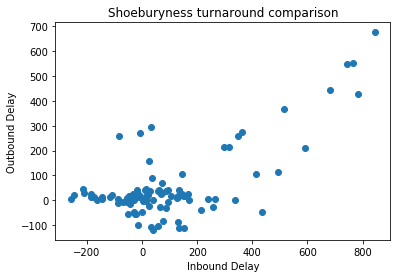

In [335]:
plt.scatter(ShoeTurnIn['InDelaysec'],ShoeTurnIn['OutDelaysec'])
plt.xlabel("Inbound Delay")
plt.ylabel("Outbound Delay")
plt.title("Shoeburyness turnaround comparison")

In [336]:
x=np.array(ShoeTurnIn['InDelaysec']).reshape((-1,1))
y=ShoeTurnIn['OutDelaysec']
model=LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept: ', model.intercept_)
print('slope: ',model.coef_)

coefficient of determination: 0.48791941396088145
intercept:  13.929055705017909
slope:  [0.44274444]


In [337]:
ShoeTurn[ShoeTurn['InDelaysec']+300>ShoeTurn['SchedStopsec']]

,SchedArr,SchedDept,InDelay,OutDelay,SchedStopover,InDelaysec,OutDelaysec,SchedStopsec
16,2019-10-01 11:30:00,2019-10-01 11:30:00,0 days 00:01:27,0 days 00:20:03,00:00:00,87.0,1203.0,0.0
28,2019-10-01 18:06:00,2019-10-01 18:14:00,0 days 00:05:15,0 days 00:03:35,00:08:00,315.0,215.0,480.0
29,2019-10-01 18:19:00,2019-10-01 18:29:00,0 days 00:05:48,0 days 00:04:20,00:10:00,348.0,260.0,600.0
30,2019-10-01 18:33:00,2019-10-01 18:44:00,0 days 00:13:05,0 days 00:07:07,00:11:00,785.0,427.0,660.0
31,2019-10-01 18:57:00,2019-10-01 19:07:00,0 days 00:12:45,0 days 00:09:13,00:10:00,765.0,553.0,600.0
33,2019-10-01 20:39:00,2019-10-01 20:46:00,0 days 00:02:11,0 days 00:00:14,00:07:00,131.0,14.0,420.0
36,2019-10-01 22:36:00,2019-10-01 22:41:00,0 days 00:11:25,0 days 00:20:12,00:05:00,685.0,1212.0,300.0
38,2019-10-02 01:51:00,2019-10-01 20:07:00,-1 days +23:58:39,0 days 05:48:25,-1 days +18:16:00,-81.0,20905.0,-20640.0
58,2019-10-01 17:52:00,2019-10-01 17:59:00,0 days 00:04:58,0 days 00:03:33,00:07:00,298.0,213.0,420.0
59,2019-10-01 18:26:00,2019-10-01 18:36:00,0 days 00:06:54,0 days 00:01:45,00:10:00,414.0,105.0,600.0


In [291]:
ShoeTurn.plot.scatter(x = 'InDelay', y = 'OutDelay')

ValueError: scatter requires x column to be numeric

In [333]:
ShoeTurn[ShoeTurn['InDelay']>ShoeTurn['SchedStopover']+x]

TypeError: cannot add float64-dtype to TimedeltaArray

In [ ]:
if schedstopover>indelay+min turnaround
    outdelay=0
else
    outdelay=indelay+min turnaround-schedstopover